# EDA

## Import libraries

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Statistical tests
from scipy import stats, signal
from pymannkendall import original_test

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Import data

In [4]:
df = pd.read_csv('../data/CO2 emission by countries.csv', encoding='cp1252')
df.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


### Variable check

In [6]:
# Print number unique values of each column
for col in df.columns:
    print(col, len(df[col].unique()))

Country 220
Code 213
Calling Code 204
Year 271
CO2 emission (Tons) 18352
Population(2022) 197
Area 205
% of World 24
Density(km2) 146


We'll examine each variable to assess its structure, meaning, and characteristics.  
The goal is to perform an initial selection of variables for forecasting while anticipating potential feature engineering and modeling considerations.

##### Check Code

In [7]:
# Filter where Code is null
df[df['Code'].isnull()]

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
36585,Namibia,NaN,264,1750,0.0,2567012.0,825615.0,0.60%,3/km²
36586,Namibia,NaN,264,1751,0.0,2567012.0,825615.0,0.60%,3/km²
36587,Namibia,NaN,264,1752,0.0,2567012.0,825615.0,0.60%,3/km²
36588,Namibia,NaN,264,1753,0.0,2567012.0,825615.0,0.60%,3/km²
36589,Namibia,NaN,264,1754,0.0,2567012.0,825615.0,0.60%,3/km²
...,...,...,...,...,...,...,...,...,...
53111,Tanzania,NaN,255,2016,197662823.0,65497748.0,945087.0,0.60%,69/km²
53112,Tanzania,NaN,255,2017,209069510.0,65497748.0,945087.0,0.60%,69/km²
53113,Tanzania,NaN,255,2018,220860280.0,65497748.0,945087.0,0.60%,69/km²
53114,Tanzania,NaN,255,2019,232902865.0,65497748.0,945087.0,0.60%,69/km²


In [8]:
# Check which countries have multiple unique Code values
countries_with_multiple_codes = df.groupby('Country')['Code'].nunique()
multiple_codes = countries_with_multiple_codes[countries_with_multiple_codes > 1]

The `Code` variable contains the same information as `Country`, so we will not include it in further analysis.

##### Check Calling Code

In [9]:
df[df['Calling Code'].isnull()]['Country'].unique()

array(['Congo', "Cote d'Ivoire", 'Czechia',
       'Democratic Republic of Congo', 'Eswatini', 'Faeroe Islands',
       'French Guiana', 'Guadeloupe', 'Macao', 'Martinique',
       'North Macedonia', 'Sint Maarten (Dutch part)', 'Timor'],
      dtype=object)

In [10]:
# Check which countries have multiple unique Calling Code values
countries_with_multiple_calling_code = df.groupby('Country')['Calling Code'].nunique()
multiple_calling_code = countries_with_multiple_calling_code[countries_with_multiple_calling_code > 1]
multiple_calling_code

Series([], Name: Calling Code, dtype: int64)

In [11]:
# Check which Calling Code  have multiple unique Country values
calling_code_with_multiple_countries = df.groupby('Calling Code')['Country'].nunique()
multiple_countries = calling_code_with_multiple_countries[calling_code_with_multiple_countries > 1]
multiple_countries
#show the countries


Calling Code
1      2
262    2
61     2
7      2
Name: Country, dtype: int64

In [12]:
df[df['Calling Code'] == '7']

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
26829,Kazakhstan,KZ,7,1750,0.000000e+00,19397998.0,2724900.0,1.80%,7/km²
26830,Kazakhstan,KZ,7,1751,0.000000e+00,19397998.0,2724900.0,1.80%,7/km²
26831,Kazakhstan,KZ,7,1752,0.000000e+00,19397998.0,2724900.0,1.80%,7/km²
26832,Kazakhstan,KZ,7,1753,0.000000e+00,19397998.0,2724900.0,1.80%,7/km²
26833,Kazakhstan,KZ,7,1754,0.000000e+00,19397998.0,2724900.0,1.80%,7/km²
...,...,...,...,...,...,...,...,...,...
44439,Russia,NaN,7,2016,1.090000e+11,144713314.0,17098242.0,11.00%,8/km²
44440,Russia,NaN,7,2017,1.100000e+11,144713314.0,17098242.0,11.00%,8/km²
44441,Russia,NaN,7,2018,1.120000e+11,144713314.0,17098242.0,11.00%,8/km²
44442,Russia,NaN,7,2019,1.140000e+11,144713314.0,17098242.0,11.00%,8/km²


In [13]:
# convert calling code to numeric
# Replace - character with '' and split by , and get the first number
df['Calling Code'] = df['Calling Code'].str.replace('-', '')
df['Calling Code'] = df['Calling Code'].str.split(',').str[0]
df['Calling Code'] = pd.to_numeric(df['Calling Code'])

In [14]:
calling_codes = {
    'Congo': 242,
    "Cote d'Ivoire": 225,
    'Czechia': 420,
    'Democratic Republic of Congo': 243,
    'Eswatini': 268,
    'Faeroe Islands': 298,
    'French Guiana': 594,
    'Guadeloupe': 590,
    'Macao': 853,
    'Martinique': 596,
    'North Macedonia': 389,
    'Sint Maarten (Dutch part)': 1721,
    'Timor': 670
}
for country, code in calling_codes.items():
    df.loc[df['Country'] == country, 'Calling Code'] = code

The `Calling Code` represents the international dialing prefix assigned to each country.  
Although not unique—since some countries, like Canada and the USA, share the same code—it still provides regional information that may be relevant for CO₂ emissions analysis.  

This feature could help distinguish continents and economic regions, which play a key role in emissions.  
For example, Africa and the Middle East likely have different emission ranges compared to Western Europe or North America.  
Additionally, there may be patterns related to development levels, as more established countries often have lower calling codes.  

A small number of countries (19 out of 220) were missing a calling code. Given that the proportion is low, we filled in these missing values using the corresponding code for each country.

##### Year

In [15]:
# Get unique years
unique_years = df['Year'].unique()

# Count of unique years
num_unique_years = len(unique_years)

# Min and max years
min_year = df['Year'].min()
max_year = df['Year'].max()

print(f"Number of unique years: {num_unique_years}")
print(f"Minimum year: {min_year}")
print(f"Maximum year: {max_year}")

Number of unique years: 271
Minimum year: 1750
Maximum year: 2020


In [16]:
# Check for missing years in the range
all_years_in_range = set(range(min_year, max_year + 1))
missing_years = all_years_in_range - set(unique_years)
num_missing_years = len(missing_years)
missing_years

set()

##### CO2 Emissions

In [17]:
df['CO2 emission (Tons)'].describe()

count    5.962000e+04
mean     1.034774e+09
std      1.041652e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.715092e+06
max      4.170000e+11
Name: CO2 emission (Tons), dtype: float64

In [18]:
result_df = df.groupby('Year').apply(
    lambda x: (
        (x['CO2 emission (Tons)'] == 0).sum() / len(x) * 100
    ),
    include_groups=False
).reset_index(name='Percentage')

result_df['Total Countries'] = df.groupby('Year').size().values
result_df['Null or Zero Emissions'] = df.groupby('Year').apply(
    lambda x: (x['CO2 emission (Tons)'].isnull() | (x['CO2 emission (Tons)'] == 0)).sum(),
    include_groups=False
).values

result_df['Percentage'] = result_df['Percentage'].round(2)
high_missing_years = result_df[result_df['Percentage'] > 50].sort_values('Year')

high_missing_years.Year.unique()

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

/Users/omar/Perso/smway-forecasting/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/omar/Perso/smway-forecasting/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


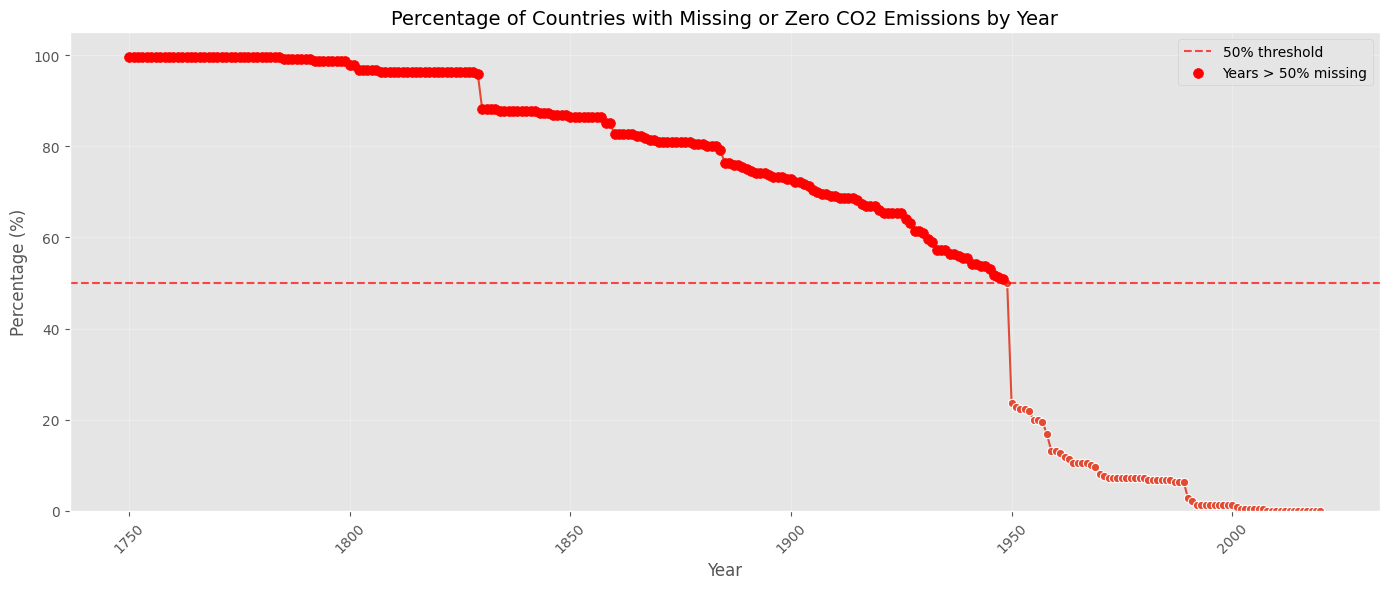

In [19]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data=result_df, x='Year', y='Percentage', marker='o', ax=ax)

ax.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% threshold')
high_missing_mask = result_df['Percentage'] > 50
ax.scatter(
    result_df.loc[high_missing_mask, 'Year'], 
    result_df.loc[high_missing_mask, 'Percentage'],
    color='red', s=50, zorder=5, label='Years > 50% missing'
)
ax.set_title('Percentage of Countries with Missing or Zero CO2 Emissions by Year', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_ylim(0, 105)  # Set y-axis to show 0-100% with a little padding
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The emissions data begins in 1750, but most countries did not report emissions until 1950, when approximately 50% of countries started reporting.  
We'll treat `CO2 emissions` equal to zero as missing data, under the assumption that no country has zero emissions.  
If we decide to impute missing values, we will treat zero emissions as part of the emissions to be imputed.

In [20]:
# Check if Year and Country are unique together
unique_year_country = df.groupby(['Year', 'Country']).size().reset_index(name='Count')
duplicate_year_country = unique_year_country[unique_year_country['Count'] > 1]
duplicate_year_country

,Year,Country,Count


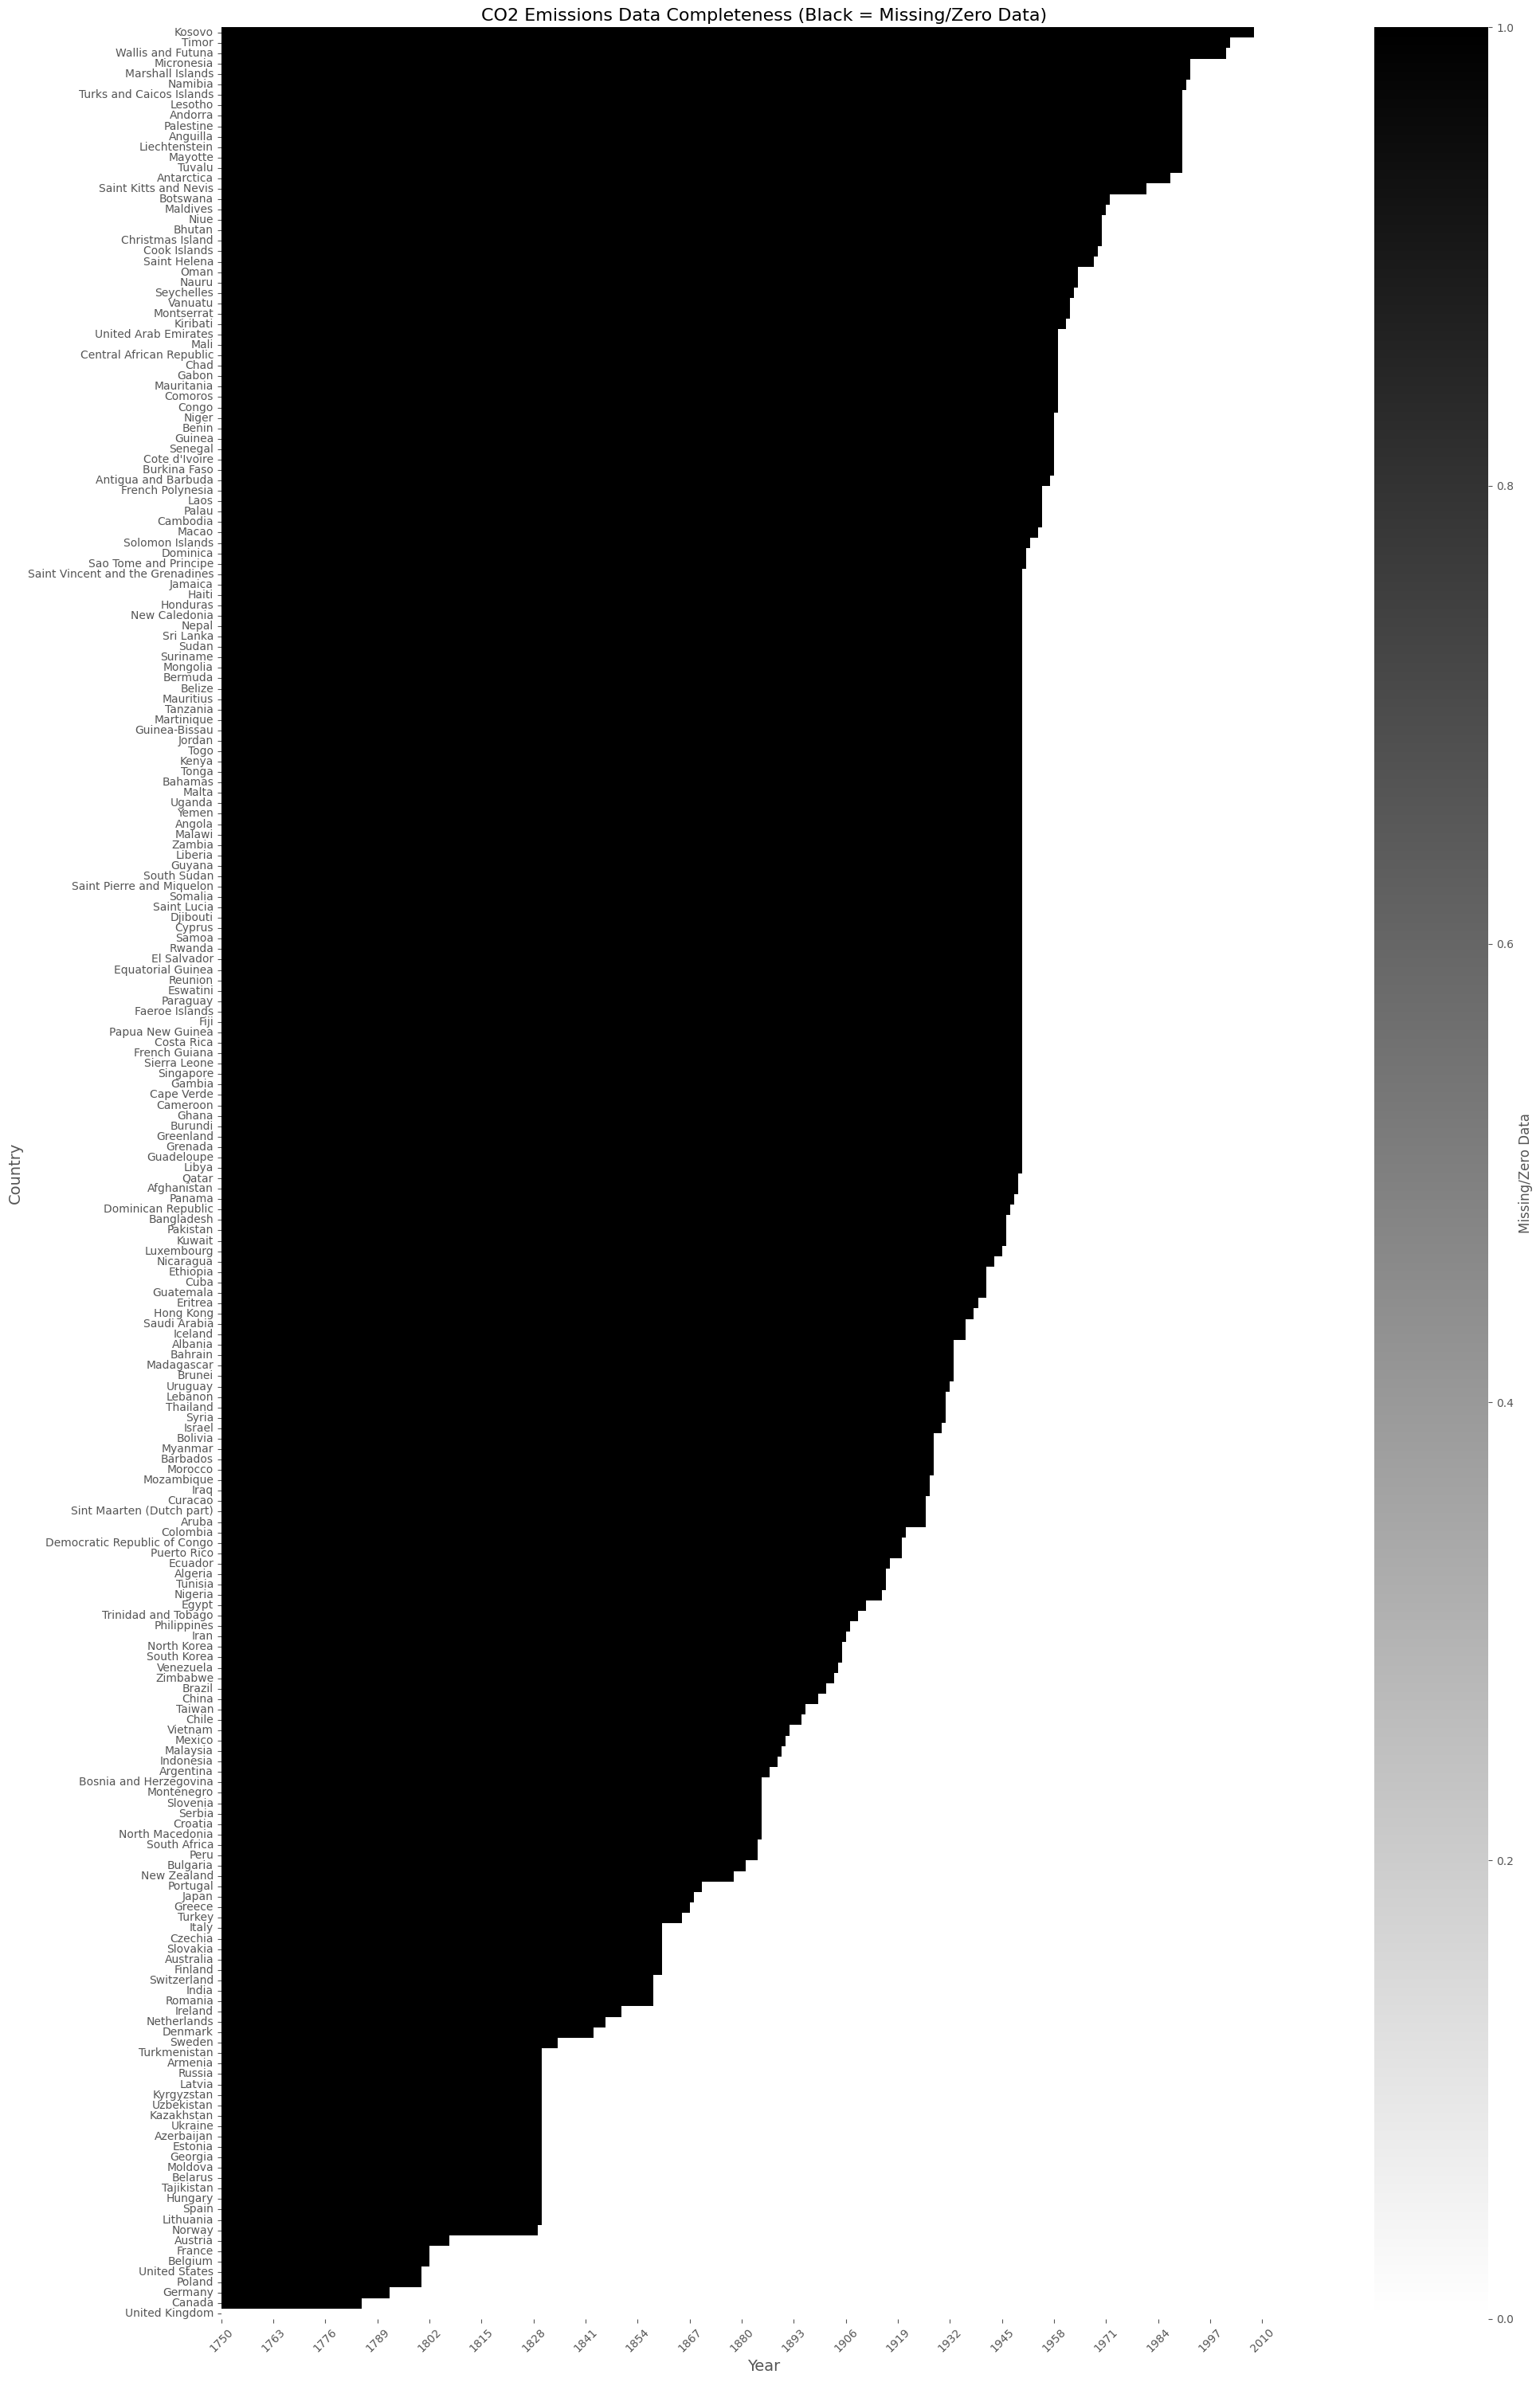

In [21]:
pivot_data = pd.pivot_table(
   df,
   values='CO2 emission (Tons)',
   index='Country',
   columns='Year',
   aggfunc=lambda x: 1 if (pd.isna(x).all() or (x == 0).all()) else 0
)

missing_pct = pivot_data.mean(axis=1).sort_values(ascending=False)
pivot_data = pivot_data.loc[missing_pct.index]

plt.figure(figsize=(20, 30))
ax = plt.subplot(111)

sns.heatmap(
   pivot_data,
   cmap='binary',
   yticklabels=True,
   xticklabels=True,
   cbar_kws={'label': 'Missing/Zero Data'},
   ax=ax
)

plt.title('CO2 Emissions Data Completeness (Black = Missing/Zero Data)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)

step = max(1, len(pivot_data.columns) // 20)
plt.xticks(np.arange(len(pivot_data.columns))[::step], pivot_data.columns[::step], rotation=45)

plt.tight_layout()
plt.show()

Developed countries, which tend to have higher pollution levels, often show earlier reporting measures. This is an important aspect to capture, as the duration of time a country has been reporting emissions could play a significant role in our analysis. Smaller countries typically have less data available, which may reduce the accuracy of predictions, as we will rely more on imputed data. 

We'll ensure that, during evaluation, we'll focus on countries that exhibit characteristics of low emitters.

In [22]:
never_emitted = []
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    
    # Check if all emission values are zero or null
    if (country_data['CO2 emission (Tons)'].isna() | (country_data['CO2 emission (Tons)'] == 0)).all():
        # Add country info
        never_emitted.append({
            'Country': country,
            'Years': f"{country_data['Year'].min()}-{country_data['Year'].max()}",
            'Num Years': len(country_data),
            'Has Population': not country_data['Population(2022)'].isna().all()
        })

# Create DataFrame and sort
result = pd.DataFrame(never_emitted)
# Simple summary
print(f"Found {len(result)} countries with no emissions reported")

Found 0 countries with no emissions reported


In [23]:
def check_emission_patterns(country_data):
    country_data = country_data.sort_values('Year')
    has_emissions = country_data['CO2 emission (Tons)'] > 0

    if has_emissions.any() and (~has_emissions).any():
        first_emission_year = country_data[has_emissions]['Year'].min()
        later_years = country_data[country_data['Year'] > first_emission_year]
        if len(later_years) > 0 and (~has_emissions[country_data['Year'] > first_emission_year]).any():
            return True
    
    return False

# Apply this to each country
countries_with_patterns = []

for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    
    if check_emission_patterns(country_data):
        print(country)

##### Area

In [24]:
df.Area.describe()

count    5.528400e+04
mean     6.522073e+05
std      1.865483e+06
min      2.100000e+01
25%      1.770450e+04
50%      1.103815e+05
75%      4.925730e+05
max      1.709824e+07
Name: Area, dtype: float64

In [25]:
# Count null values in the Area column
area_null_count = df['Area'].isnull().sum()

# Calculate percentage of missing values
area_null_percentage = (area_null_count / len(df)) * 100

print(f"Number of null values in Area column: {area_null_count}")
print(f"Percentage of missing Area data: {area_null_percentage:.2f}%")

Number of null values in Area column: 4336
Percentage of missing Area data: 7.27%


In [26]:
countries_with_missing_area = df.groupby('Country')['Area'].apply(lambda x: x.isnull().all())
countries_missing_all_area = countries_with_missing_area[countries_with_missing_area].index.tolist()

print(f"\nNumber of countries with no Area data at all: {len(countries_missing_all_area)}")



Number of countries with no Area data at all: 16


In [27]:
countries_missing_all_area

['Antarctica',
 'Brunei',
 'Cape Verde',
 'Christmas Island',
 "Cote d'Ivoire",
 'Curacao',
 'Democratic Republic of Congo',
 'Hong Kong',
 'Kosovo',
 'Macao',
 'North Macedonia',
 'Palestine',
 'Reunion',
 'Sint Maarten (Dutch part)',
 'Timor',
 'Wallis and Futuna']

In [28]:
df[
    (df['Country'].isin(countries_missing_all_area))
    & (df['CO2 emission (Tons)'] > 0)
]

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
1863,Antarctica,AQ,672.0,1987,3664.0,NaN,NaN,NaN,NaN
1864,Antarctica,AQ,672.0,1988,10992.0,NaN,NaN,NaN,NaN
1865,Antarctica,AQ,672.0,1989,18320.0,NaN,NaN,NaN,NaN
1866,Antarctica,AQ,672.0,1990,29312.0,NaN,NaN,NaN,NaN
1867,Antarctica,AQ,672.0,1991,43968.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
58802,Wallis and Futuna,WF,681.0,2016,403040.0,NaN,NaN,NaN,NaN
58803,Wallis and Futuna,WF,681.0,2017,428688.0,NaN,NaN,NaN,NaN
58804,Wallis and Futuna,WF,681.0,2018,454336.0,NaN,NaN,NaN,NaN
58805,Wallis and Futuna,WF,681.0,2019,480773.0,NaN,NaN,NaN,NaN


In [29]:
area_counts = df.groupby('Country')['Area'].nunique()
multiple_areas = area_counts[area_counts > 1]
print(f"Countries with multiple area values: {len(multiple_areas)}")

Countries with multiple area values: 0


#####  % of World

In [30]:
inconsistent_count = ((df['Area'].isnull() & df['% of World'].notnull()) | 
                      (df['Area'].notnull() & df['% of World'].isnull())).sum()
print(f"Records with inconsistent Area and % of World: {inconsistent_count} ")

Records with inconsistent Area and % of World: 0 


In [31]:
df['% of World'] = df['% of World'].str.replace('%', '', regex=False).apply(pd.to_numeric, errors='coerce')

In [32]:
# get country with nan % of world
df[df['% of World'].isnull()]['Country'].unique()

array(['Antarctica', 'Brunei', 'Cape Verde', 'Christmas Island',
       "Cote d'Ivoire", 'Curacao', 'Democratic Republic of Congo',
       'Hong Kong', 'Kosovo', 'Macao', 'North Macedonia', 'Palestine',
       'Reunion', 'Sint Maarten (Dutch part)', 'Timor',
       'Wallis and Futuna'], dtype=object)

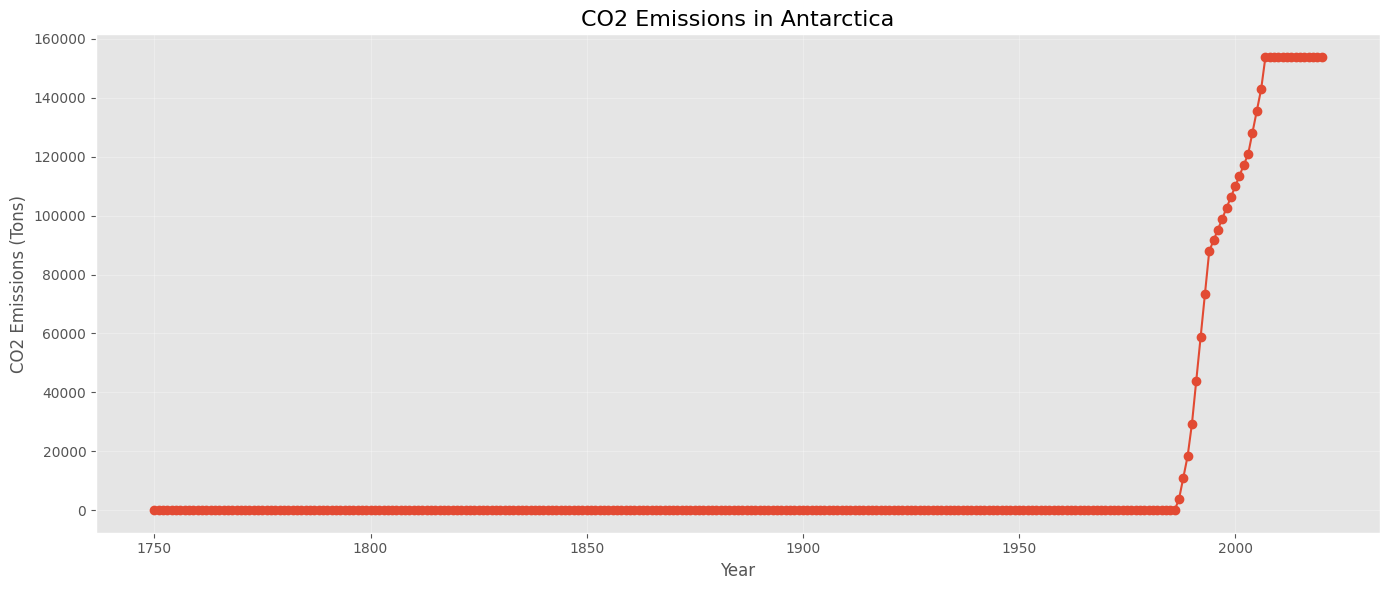

In [33]:
#plot Antarctica emission evolution
antartica = df[df['Country'] == 'Antarctica']
plt.figure(figsize=(14, 6))
plt.plot(antartica['Year'], antartica['CO2 emission (Tons)'], marker='o')
plt.title('CO2 Emissions in Antarctica', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (Tons)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
prct_world = {
    'Antarctica': 0.0001,
    'Brunei': 0.0039,
    'Cape Verde': 0.0027,
    'Christmas Island': 0.00009,
    "Cote d'Ivoire": 0.216,
    'Curacao': 0.00030,
    'Democratic Republic of Congo': 1.57,
    'Hong Kong': 0.00074,
    'Kosovo': 0.0073,
    'Macao': 0.000022,
    'North Macedonia': 0.017,
    'Palestine': 0.0042,
    'Reunion': 0.0017,
    'Sint Maarten (Dutch part)': 0.000023,
    'Timor (East Timor)': 0.010,
    'Wallis and Futuna': 0.00018
}
for country, value in prct_world.items():
    df.loc[df['Country'] == country, '% of World'] = value

df[df['Country'] == 'Reunion']

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
43631,Reunion,NaN,262.0,1750,0.0,974052.0,NaN,0.0017,388/km²
43632,Reunion,NaN,262.0,1751,0.0,974052.0,NaN,0.0017,388/km²
43633,Reunion,NaN,262.0,1752,0.0,974052.0,NaN,0.0017,388/km²
43634,Reunion,NaN,262.0,1753,0.0,974052.0,NaN,0.0017,388/km²
43635,Reunion,NaN,262.0,1754,0.0,974052.0,NaN,0.0017,388/km²
...,...,...,...,...,...,...,...,...,...
43897,Reunion,NaN,262.0,2016,105849209.0,974052.0,NaN,0.0017,388/km²
43898,Reunion,NaN,262.0,2017,110290349.0,974052.0,NaN,0.0017,388/km²
43899,Reunion,NaN,262.0,2018,114691711.0,974052.0,NaN,0.0017,388/km²
43900,Reunion,NaN,262.0,2019,119279659.0,974052.0,NaN,0.0017,388/km²


In [35]:
# Calculate correlation matrix
cols = [ 'Area', '% of World']
corr = df[cols].corr()
corr

,Area,% of World
Area,1.000000,0.997384
% of World,0.997384,1.000000


The `Area` and `% of World` variables are highly correlated, as `% of World` represents the percentage of global land occupied by each country. Since they contain redundant information, we will retain only one for forecasting.  

Given its potential importance for both analysis and prediction, we have decided to fill missing values in `% of World` with their correct proportions. Our assumption is that larger countries tend to have higher emissions, though we will validate this later.  

For Antarctica, we intentionally assigned an extremely low `% of World` value despite its vast landmass. Since it has minimal human activity and negligible emissions, using its actual land percentage could distort the forecasting model by associating a large land area with near-zero emissions.  

It could also be valuable to explore additional features, such as the percentage of urban land or livable area per country. Some large nations, like Algeria or Mali, have big uninhabitable desert, which may affect their emissions patterns differently than countries with densely populated land.

While `Area` could theoretically change over time, we will consider it stable for our analysis. Since we plan to build the model using data from around 1950 onward, and global land areas have remained largely unchanged since then, treating `Area` as a fixed variable is a reasonable assumption.  



##### Density

In [36]:
df['Density(km2)'].unique()

array(['63/km²', '99/km²', '19/km²', '171/km²', '29/km²', nan, '212/km²',
       '16/km²', '93/km²', '3/km²', '107/km²', '120/km²', '1,924/km²',
       '1,160/km²', '655/km²', '46/km²', '382/km²', '18/km²', '119/km²',
       '20/km²', '11/km²', '5/km²', '25/km²', '78/km²', '61/km²',
       '83/km²', '463/km²', '59/km²', '4/km²', '147/km²', '9/km²',
       '14/km²', '26/km²', '45/km²', '449/km²', '101/km²', '71/km²',
       '102/km²', '135/km²', '136/km²', '48/km²', '97/km²', '231/km²',
       '65/km²', '111/km²', '301/km²', '60/km²', '31/km²', '69/km²',
       '112/km²', '51/km²', '117/km²', '253/km²', '54/km²', '233/km²',
       '140/km²', '79/km²', '0/km²', '365/km²', '243/km²', '164/km²',
       '56/km²', '417/km²', '6,783/km²', '431/km²', '145/km²', '435/km²',
       '196/km²', '257/km²', '328/km²', '126/km²', '7/km²', '162/km²',
       '166/km²', '240/km²', '33/km²', '32/km²', '525/km²', '76/km²',
       '246/km²', '42/km²', '250/km²', '50/km²', '172/km²', '103/km²',
       '1,746

In [37]:
df['Density(km2)'] = df['Density(km2)'].str.replace('/km²', '').apply(pd.to_numeric, errors='coerce')

We decided to exclude `Population` from the forecasting model. Since we are working with the provided dataset without historical population values, relying solely on 2020 data would introduce a temporal inconsistency. Training a model to forecast emissions for earlier years, such as 2000, based on 2020 population figures would likely lead to biased predictions.  

For the same reason, we are also removing `Density`. The dataset contains a single static value for density from 1750 to 2020, meaning it was derived using the 2020 population and area. Since it does not reflect historical variations, it does not provide meaningful information for forecasting.


### Data Analysis

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         59620 non-null  float64
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           59349 non-null  float64
 8   Density(km2)         51490 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 4.1+ MB


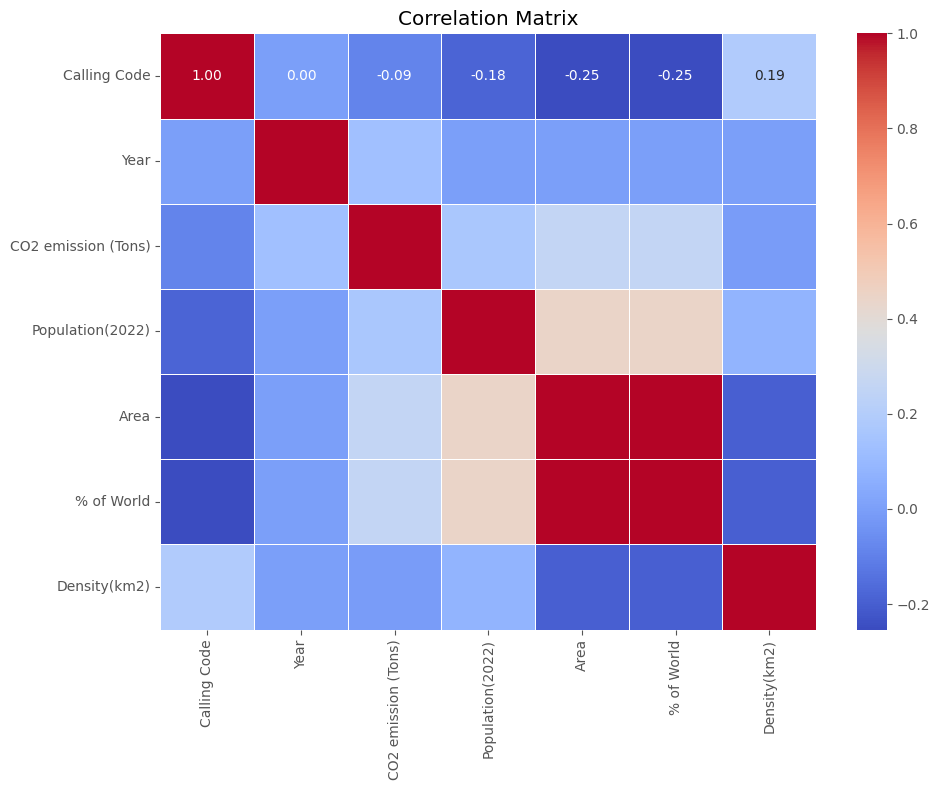

In [39]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

The correlation analysis confirms our initial observations:  

1. `Area` and `% of World` are highly correlated, reinforcing our decision to keep only one for forecasting.  
2. A slight negative correlation between `Calling Code` and emissions suggests that countries with lower calling codes tend to have higher emissions.  
3. Across different years, there is a mild positive correlation between `Year` and emissions, which may indicate an upward trend in emissions over time.  


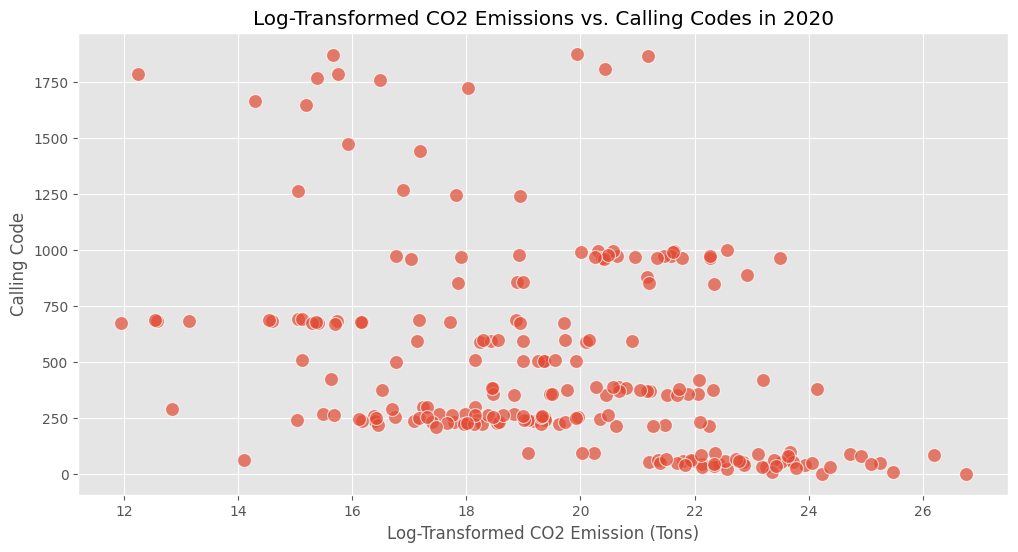

In [40]:
df['Log CO2 emission (Tons)'] = np.log1p(df['CO2 emission (Tons)'])

plt.figure(figsize=(12, 6))

# Scatter plot with log-transformed CO2 emissions
sns.scatterplot(data=df[df['Year'] == 2020], y='Calling Code', x='Log CO2 emission (Tons)', s=100, alpha=0.7)
plt.ylabel('Calling Code')
plt.xlabel('Log-Transformed CO2 Emission (Tons)')
plt.title('Log-Transformed CO2 Emissions vs. Calling Codes in 2020')

plt.show()

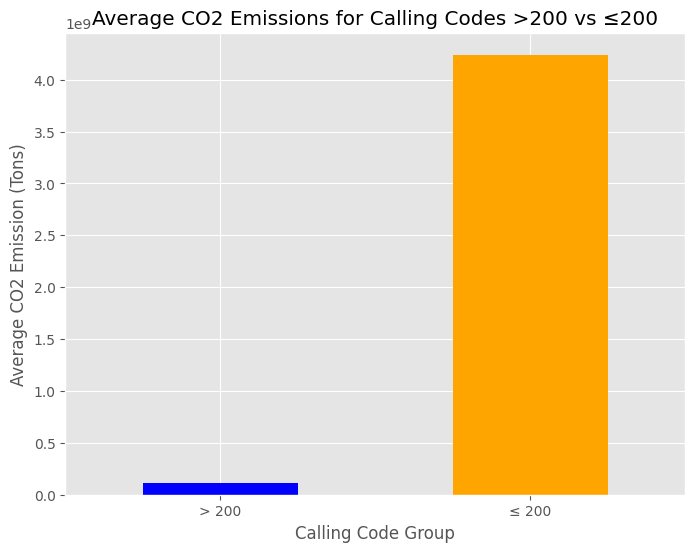

In [41]:
# Categorize countries based on calling code
df['Calling Code Group'] = df['Calling Code'].apply(lambda x: '> 200' if x > 200 else '≤ 200')
average_emission = df.groupby('Calling Code Group')['CO2 emission (Tons)'].mean()

plt.figure(figsize=(8, 6))
average_emission.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Calling Code Group')
plt.ylabel('Average CO2 Emission (Tons)')
plt.title('Average CO2 Emissions for Calling Codes >200 vs ≤200')
plt.xticks(rotation=0)
plt.show()

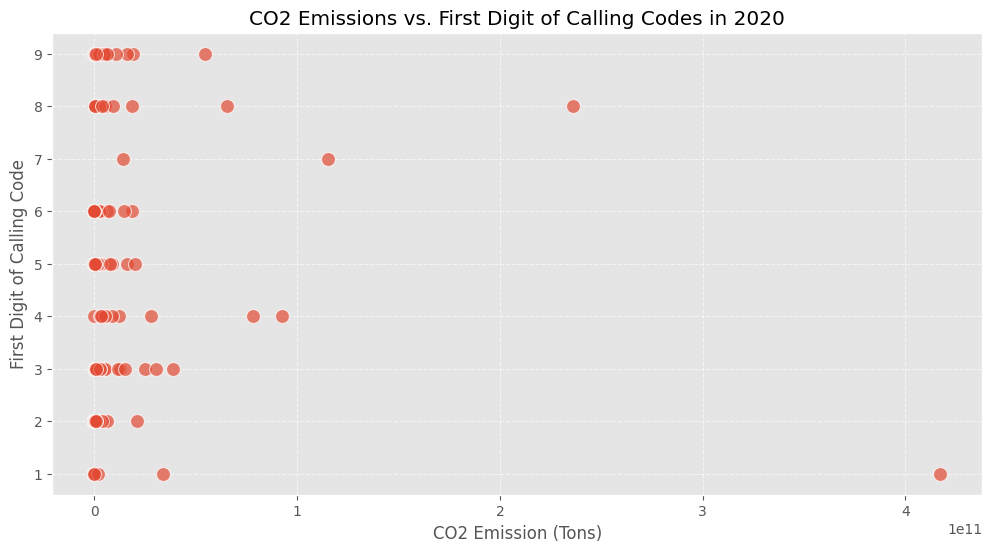

In [42]:
df['Calling Code'] = df['Calling Code'].astype(str)
df = df[df['Calling Code'].str[0].str.isdigit()]
df['First Digit'] = df['Calling Code'].str[0].astype(int)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['Year'] == 2020], y='First Digit', x='CO2 emission (Tons)', s=100, alpha=0.7)
plt.ylabel('First Digit of Calling Code')
plt.xlabel('CO2 Emission (Tons)')
plt.title('CO2 Emissions vs. First Digit of Calling Codes in 2020')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

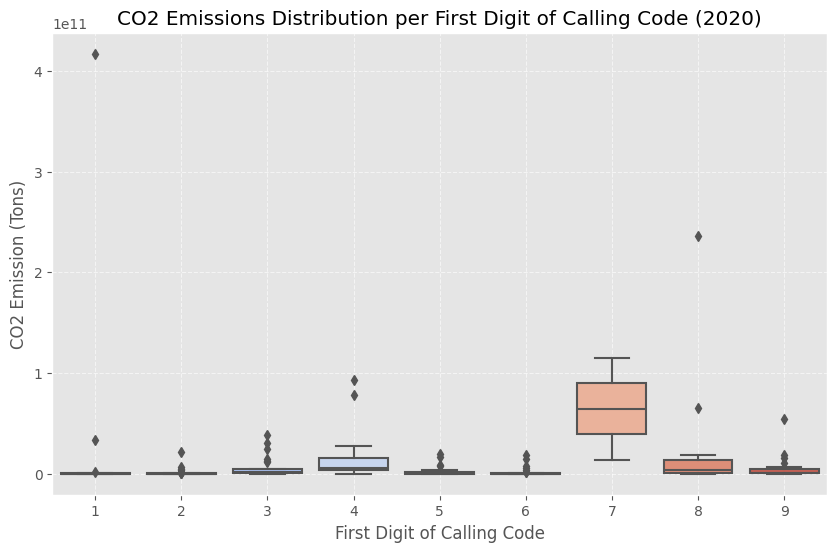

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['Year'] == 2020], x='First Digit', y='CO2 emission (Tons)', palette='coolwarm')
plt.xlabel('First Digit of Calling Code')
plt.ylabel('CO2 Emission (Tons)')
plt.title('CO2 Emissions Distribution per First Digit of Calling Code (2020)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

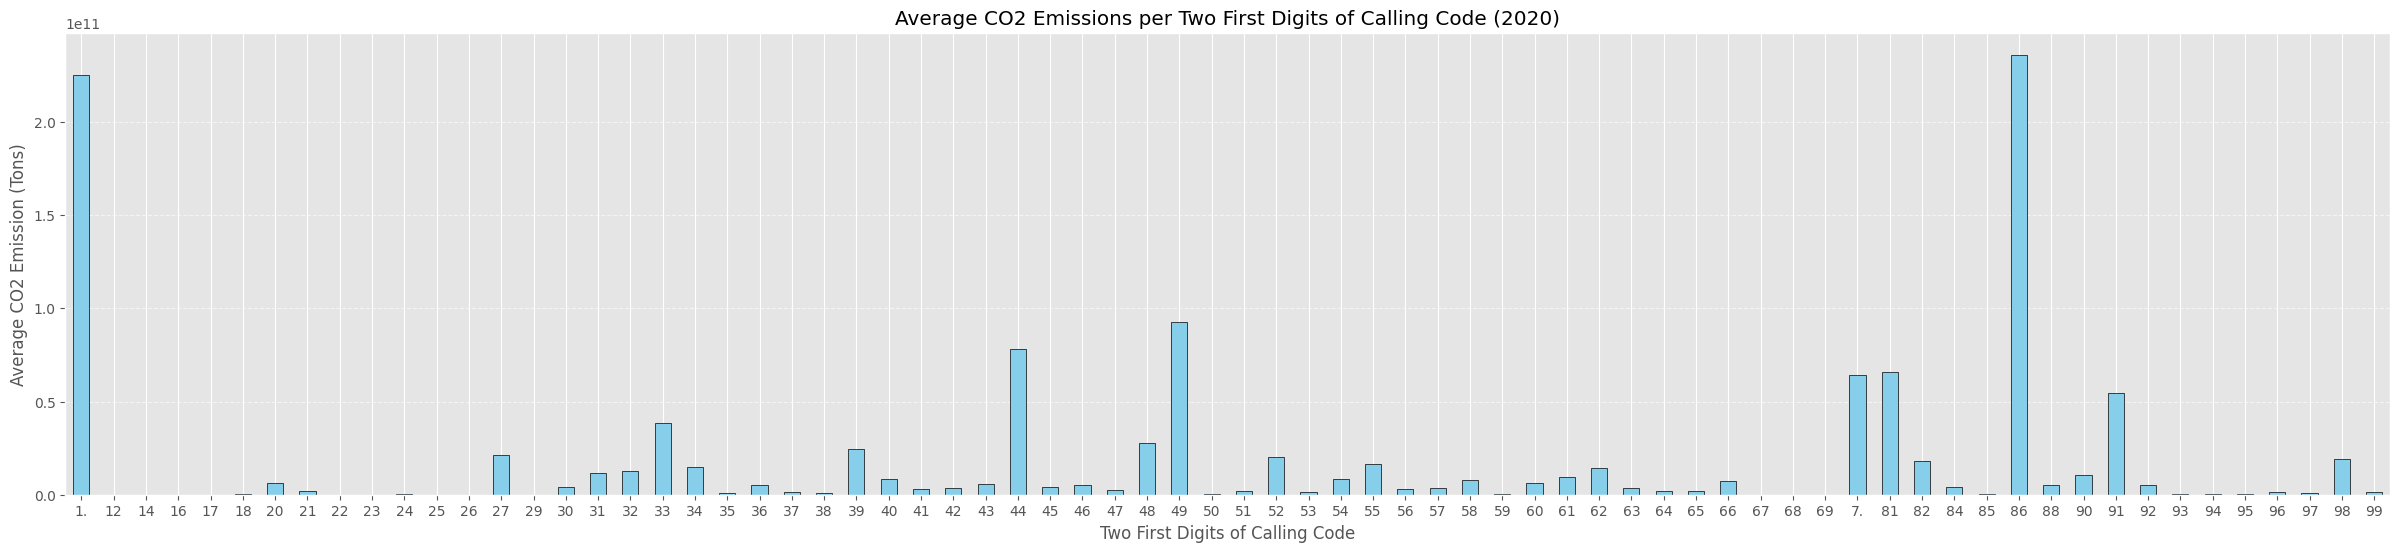

In [44]:
df['Calling Code'] = df['Calling Code'].astype(str)
df = df[df['Calling Code'].str[0].str.isdigit()]
df['Two First Digits'] = df['Calling Code'].str[0:2]


avg_emission = df[df['Year'] == 2020].groupby('Two First Digits')['CO2 emission (Tons)'].median()

plt.figure(figsize=(30, 6))
avg_emission.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Two First Digits of Calling Code')
plt.ylabel('Average CO2 Emission (Tons)')
plt.title('Average CO2 Emissions per Two First Digits of Calling Code (2020)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


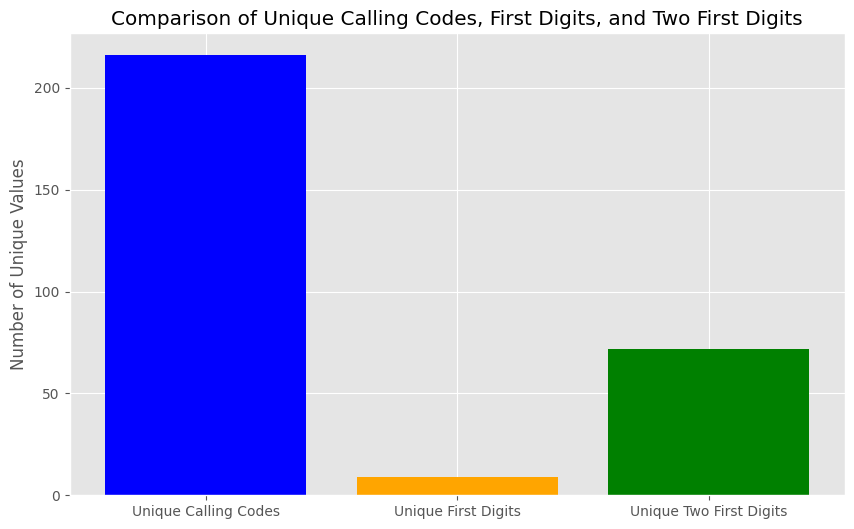

In [45]:
df['First Digit'] = df['Calling Code'].astype(str).str[0]  # First digit
df['Two First Digits'] = df['Calling Code'].astype(str).str[:2]  # First two digits

unique_calling_codes = df['Calling Code'].nunique()
unique_first_digit = df['First Digit'].nunique()
unique_two_first_digits = df['Two First Digits'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(['Unique Calling Codes', 'Unique First Digits', 'Unique Two First Digits'], 
        [unique_calling_codes, unique_first_digit, unique_two_first_digits], color=['blue', 'orange', 'green'])
plt.ylabel('Number of Unique Values')
plt.title('Comparison of Unique Calling Codes, First Digits, and Two First Digits')
plt.show()

Given the high variation among groups, a comparison of average emissions between countries with `Calling Code` below 200 and those above suggests that there are no major emitters among countries with high calling codes.  

This aligns with our earlier observations:  
- Countries with higher calling codes are predominantly located in Africa, which has the lowest emissions worldwide, and in small island nations.  
- While there are exceptions, such as industrialized Eastern European countries like Ukraine (Calling Code 380), they remain outliers rather than a defining trend.  


In [46]:
top = 20
#identify the top  emitting countries based on their most recent emissions
latest_data = df.sort_values('Year', ascending=False).drop_duplicates('Country')
top10_countries = latest_data.nlargest(top, 'CO2 emission (Tons)')['Country'].tolist()

In [47]:
emissions_pivot = pd.pivot_table(
    df,
    values='CO2 emission (Tons)',
    index='Country',
    columns='Year',
    aggfunc='sum'
)
# Separate top 10 and rest of the world
top10_emissions = emissions_pivot.loc[emissions_pivot.index.isin(top10_countries)]
rest_emissions = emissions_pivot.loc[~emissions_pivot.index.isin(top10_countries)]
rest_of_world = rest_emissions.sum(axis=0)

In [48]:
# Create a new dataframe for plotting
plot_data = pd.DataFrame()
for country in top10_countries:
    if country in emissions_pivot.index:
        plot_data[country] = emissions_pivot.loc[country]
plot_data['Rest of World'] = rest_of_world

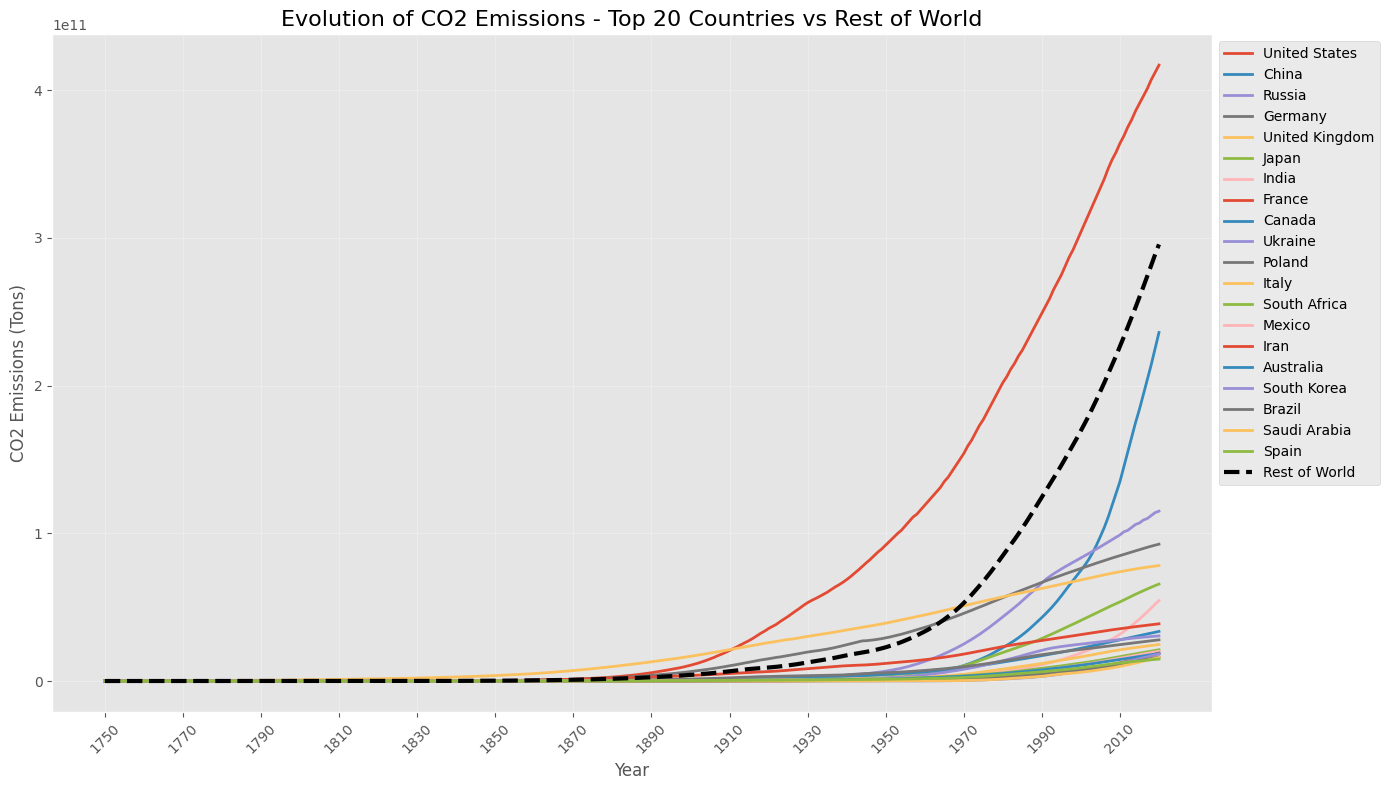

In [49]:
# Plot the evolution
plt.figure(figsize=(14, 8))
for country in plot_data.columns[:-1]:  # All except Rest of World
    plt.plot(plot_data.index, plot_data[country], linewidth=2, label=country)

# Plot Rest of World with different style
plt.plot(plot_data.index, plot_data['Rest of World'], 
         linewidth=3, linestyle='--', color='black', label='Rest of World')

plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (Tons)', fontsize=12)
plt.title(f'Evolution of CO2 Emissions - Top {top} Countries vs Rest of World', fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, alpha=0.3)
plt.xticks(np.arange(min(plot_data.index), max(plot_data.index)+1, 20), rotation=45)
plt.tight_layout()
plt.show()

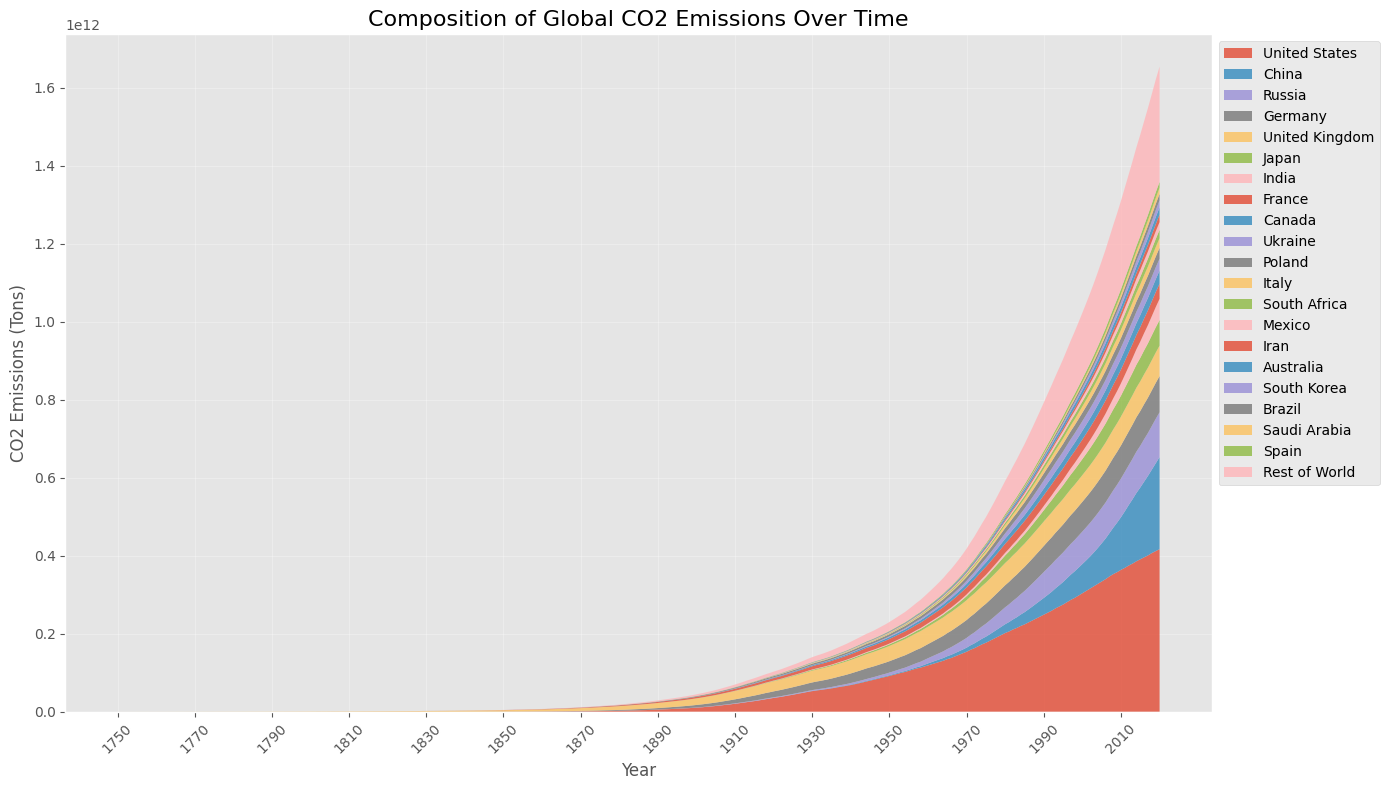

In [50]:
#Create a stacked area chart to show the composition
plt.figure(figsize=(14, 8))

# Create stacked area chart
plt.stackplot(plot_data.index, 
              [plot_data[country] for country in plot_data.columns],
              labels=plot_data.columns,
              alpha=0.8)

plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (Tons)', fontsize=12)
plt.title('Composition of Global CO2 Emissions Over Time', fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, alpha=0.3)
plt.xticks(np.arange(min(plot_data.index), max(plot_data.index)+1, 20), rotation=45)
plt.tight_layout()
plt.show()

When evaluating the forecasting model, special attention will be needed for lower-emission countries.  

The USA's emissions exceed those of the rest of the world when excluding the top 19 highest-emitting countries. In other words, the USA alone emits more CO2 than 200 countries combined. This highlights the extreme imbalance in emissions distribution, which may result in significant variance within the dataset.  

Given this disparity, we must be cautious when interpreting model performance across different emission levels to ensure that lower-emission countries are not overshadowed by the dominant impact of high emitters.  


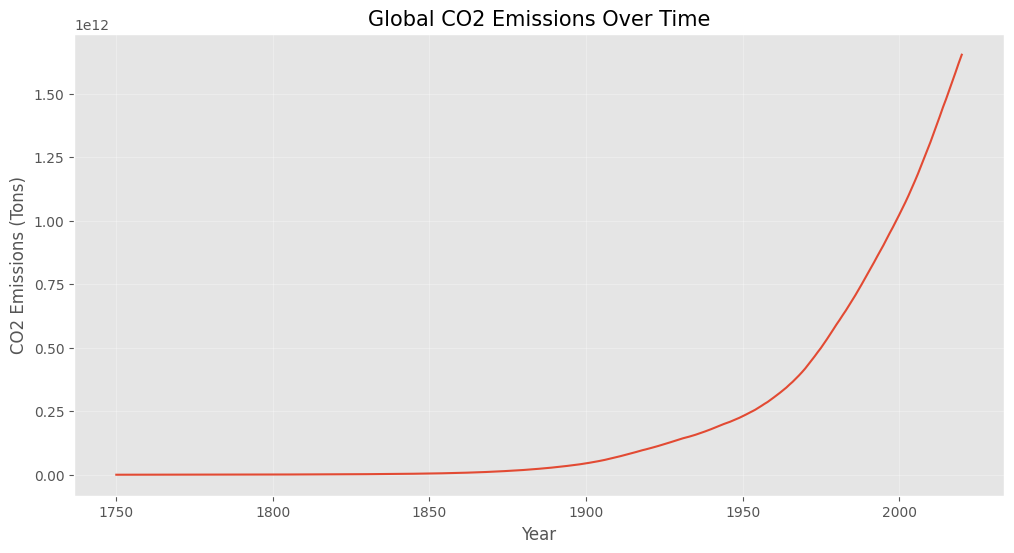

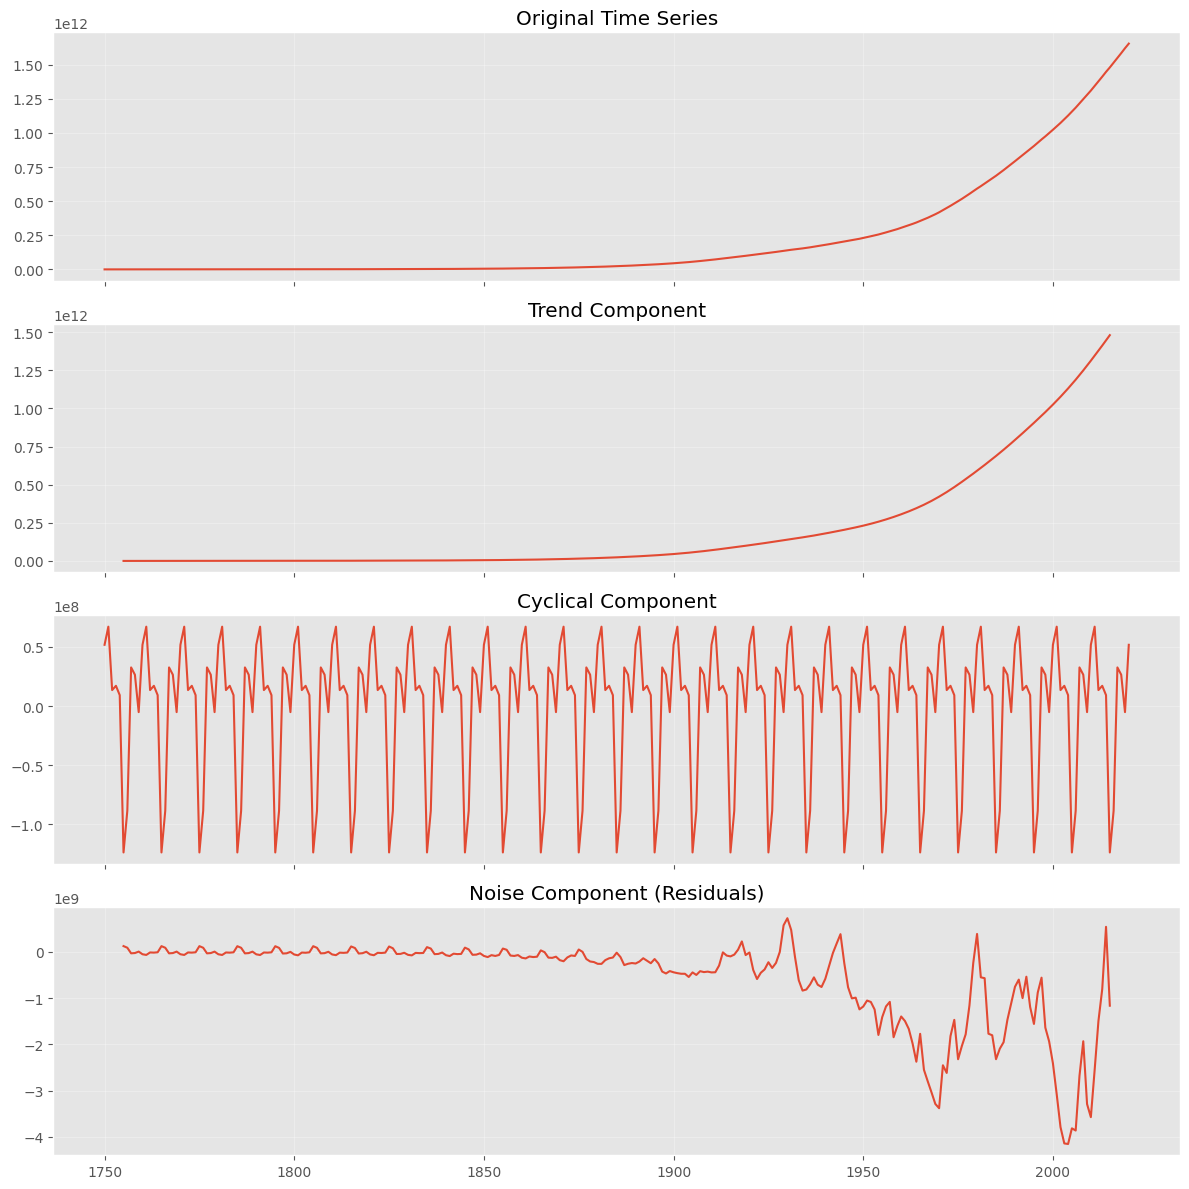

In [51]:
# First, let's aggregate global emissions by year
global_emissions = df.groupby('Year')['CO2 emission (Tons)'].sum().reset_index()
global_emissions = global_emissions.sort_values('Year')

emissions_ts = global_emissions.set_index('Year')['CO2 emission (Tons)']

plt.figure(figsize=(12, 6))
plt.plot(emissions_ts.index, emissions_ts.values)
plt.title('Global CO2 Emissions Over Time', fontsize=15)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Tons)')
plt.grid(True, alpha=0.3)
plt.show()

# Decompose the time series into trend, seasonal, and residual components
all_years = np.arange(emissions_ts.index.min(), emissions_ts.index.max() + 1)
emissions_ts_filled = emissions_ts.reindex(all_years)
emissions_ts_filled = emissions_ts_filled.interpolate(method='linear')

period = min(10, len(emissions_ts_filled) // 2)  # Use a sensible default

decomposition = seasonal_decompose(emissions_ts_filled, model='additive', period=period)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Original data
axes[0].plot(decomposition.observed)
axes[0].set_title('Original Time Series')
axes[0].grid(True, alpha=0.3)

# Trend component
axes[1].plot(decomposition.trend)
axes[1].set_title('Trend Component')
axes[1].grid(True, alpha=0.3)

# Seasonal component
axes[2].plot(decomposition.seasonal)
axes[2].set_title('Cyclical Component')
axes[2].grid(True, alpha=0.3)

# Residual component (noise)
axes[3].plot(decomposition.resid)
axes[3].set_title('Noise Component (Residuals)')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [52]:
# Aggregate global emissions by year
global_emissions = df.groupby('Year')['Log CO2 emission (Tons)'].sum().reset_index()
global_emissions = global_emissions.sort_values('Year')
emissions_ts = global_emissions.set_index('Year')['Log CO2 emission (Tons)']

# 1. Linear Regression Trend Test
x = np.arange(len(emissions_ts))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, emissions_ts)
print("Linear Regression Trend Test:")
print(f"Slope: {slope}")
print(f"p-value: {p_value:.6f}")
print(f"Significant trend detected: {p_value < 0.05}")

# 2. Augmented Dickey-Fuller Test
adf_result = adfuller(emissions_ts)
print("\nAugmented Dickey-Fuller Test:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.6f}")
print(f"Critical Values:")
print(f"Time series is {'non-stationary (has trend)' if adf_result[1] > 0.05 else 'stationary (no trend)'}")

# 3. Mann-Kendall Trend Test
mann_kendall_result = original_test(emissions_ts)
print("\nMann-Kendall Trend Test:")
print(f"Trend: {mann_kendall_result.trend}")
print(f"p-value: {mann_kendall_result.p:.6f}")
print(f"Significant trend detected: {mann_kendall_result.p < 0.05}")

Linear Regression Trend Test:
Slope: 17.63854461414158
p-value: 0.000000
Significant trend detected: True

Augmented Dickey-Fuller Test:
ADF Statistic: 2.2741
p-value: 0.998938
Critical Values:
Time series is non-stationary (has trend)

Mann-Kendall Trend Test:
Trend: increasing
p-value: 0.000000
Significant trend detected: True


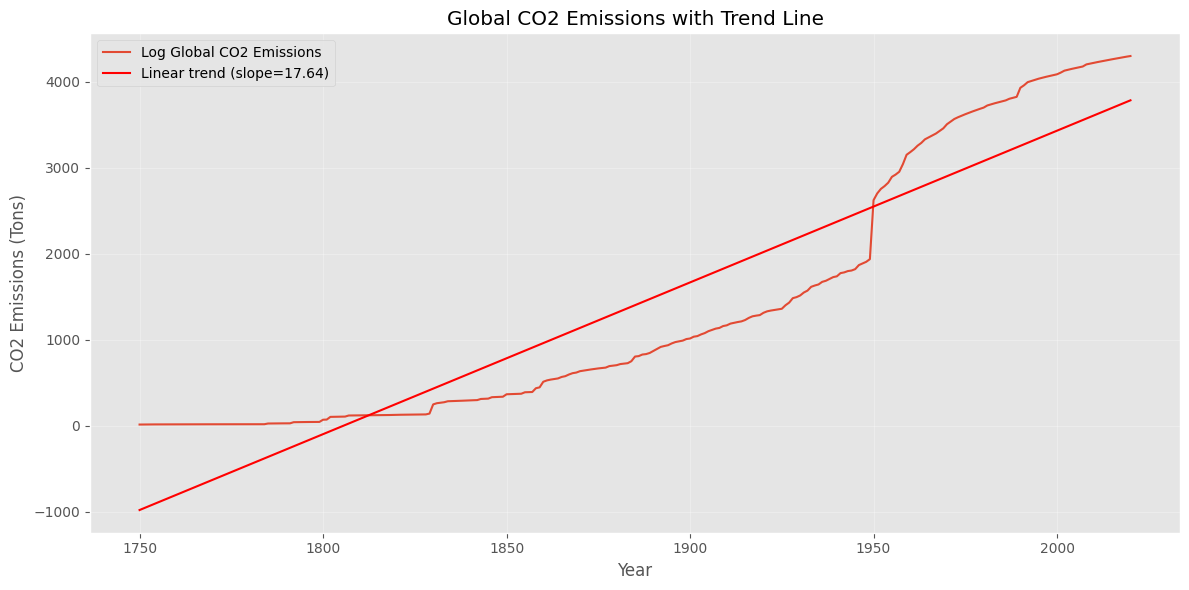

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(emissions_ts.index, emissions_ts, label='Log Global CO2 Emissions')
plt.plot(emissions_ts.index, intercept + slope * x, 'r', label=f'Linear trend (slope={slope:.2f})')
plt.title('Global CO2 Emissions with Trend Line')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Tons)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Observations confirm an upward trend in emissions, which must be accounted for in forecasting. This trend has been validated through multiple statistical tests, including Linear Regression, ADF, and the Mann-Kendall test.  

To address this, we will explore different approaches:  
- **Detrending methods**, such as Z-score normalization, to remove trend effects before modeling.  
- **Feature engineering**, by incorporating variables that explicitly capture this trend within the dataset.  

Ensuring the model properly handles this trend will be critical for long-term forecasting.  


<Figure size 2000x600 with 0 Axes>

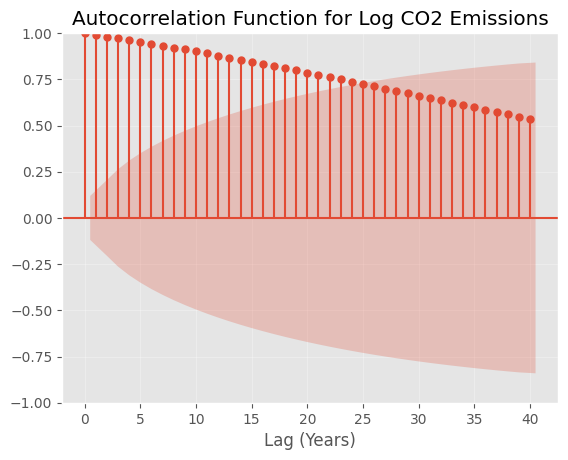

In [54]:
# 1. Autocorrelation Function (ACF) Plot
plt.figure(figsize=(20, 6))
sm.graphics.tsa.plot_acf(emissions_ts, lags=40, alpha=0.05)
plt.title('Autocorrelation Function for Log CO2 Emissions')
plt.xlabel('Lag (Years)')
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1200x600 with 0 Axes>

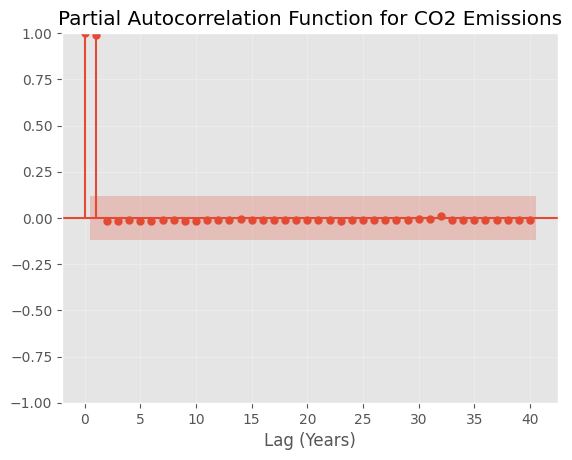

In [55]:
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(emissions_ts, lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Function for CO2 Emissions')
plt.xlabel('Lag (Years)')
plt.grid(True, alpha=0.3)
plt.show()

The **ACF plot** confirms the presence of a trend, indicating that the data is non-stationary. This means preprocessing will be required before using models like ARIMA or Linear Regression. However, we will prioritize tree-based models initially. Additionally, there is no clear seasonality in the data.  

The **PACF plot** shows that correlation drops significantly after lag 2. This suggests that the last two emissions primarily explain the current emission level.  

Since the model will predict emissions for two years ahead, and given the strong influence of the most recent emission value, we will incorporate this insight into feature engineering:  
- While using only lag 2 may yield good results, we will consider adding more lag features.  
- This will help mitigate error propagation in recursive forecasting, where the first-year prediction serves as input for the second-year forecast.  
- Adding extra lag features could smooth out the impact of potential errors in the initial prediction.  


In [56]:
total_countries = df['Country'].nunique()

yearly_reporting = df.groupby('Year').agg(
    Countries_Reporting=('CO2 emission (Tons)', lambda x: (x > 0).sum())
).reset_index()

yearly_reporting['Percentage'] = (yearly_reporting['Countries_Reporting'] / total_countries) * 100

threshold_year = yearly_reporting[yearly_reporting['Percentage'] >= 75].iloc[0]['Year'] if any(yearly_reporting['Percentage'] >= 75) else None

print(f"YEAR WHEN 75% THRESHOLD REACHED: {threshold_year}")
threshold_data = yearly_reporting[yearly_reporting['Year'] == threshold_year].iloc[0]
print(f"Countries reporting: {threshold_data['Countries_Reporting']} out of {total_countries}")
print(f"Percentage: {threshold_data['Percentage']:.2f}%")


YEAR WHEN 75% THRESHOLD REACHED: 1950.0
Countries reporting: 168.0 out of 220
Percentage: 76.36%


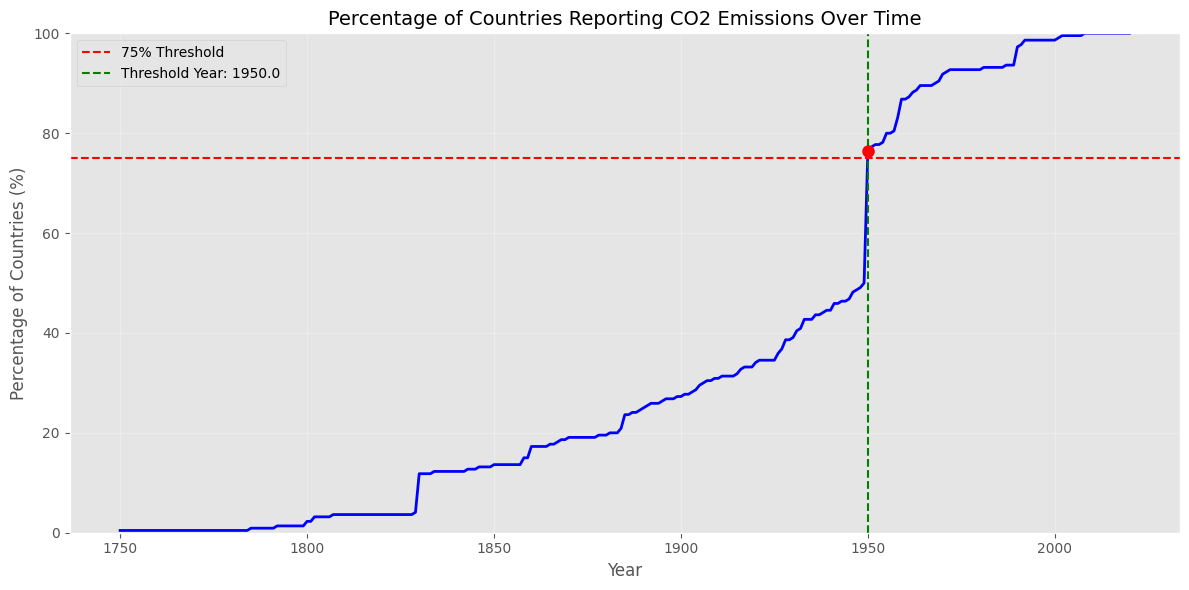

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_reporting['Year'], yearly_reporting['Percentage'], 'b-', linewidth=2)
plt.axhline(y=75, color='r', linestyle='--', label='75% Threshold')
plt.axvline(x=threshold_year, color='g', linestyle='--', label=f'Threshold Year: {threshold_year}')
# Mark the point where threshold is reached
threshold_pct = yearly_reporting[yearly_reporting['Year'] == threshold_year]['Percentage'].values[0]
plt.plot(threshold_year, threshold_pct, 'ro', markersize=8)
plt.title('Percentage of Countries Reporting CO2 Emissions Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Countries (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [58]:
recent_year = df['Year'].max()
top_emitters = df[df['Year'] == recent_year].nlargest(10, 'CO2 emission (Tons)')['Country'].tolist()

print("\nReporting start years for top 10 emitters:")
for country in top_emitters:
    first_reported = df[(df['Country'] == country) & (df['CO2 emission (Tons)'] > 0)]['Year'].min()
    print(f"{country}: {first_reported}")

# Create a timeline of major events in emission reporting
print("\nTimeline of emission reporting milestones:")
milestones = [25, 50, 75, 90]
for milestone in milestones:
    year = yearly_reporting[yearly_reporting['Percentage'] >= milestone]['Year'].min() if any(yearly_reporting['Percentage'] >= milestone) else "Not reached"
    print(f"{milestone}% of countries reporting: {year}")


Reporting start years for top 10 emitters:
United States: 1800
China: 1899
Russia: 1830
Germany: 1792
United Kingdom: 1750
Japan: 1868
India: 1858
France: 1802
Canada: 1785
Ukraine: 1830

Timeline of emission reporting milestones:
25% of countries reporting: 1890
50% of countries reporting: 1949
75% of countries reporting: 1950
90% of countries reporting: 1968


A **decent level of reporting** is reached after 1950, with approximately **75% of countries** starting to report their emissions data.  

Given this, we will **build the forecasting model using data from 1950 onward**, ensuring a more reliable foundation while minimizing gaps in historical records.  

In [59]:
df_post_1950 = df[df['Year'] >= 1950]

global_emissions = df_post_1950.groupby('Year')['CO2 emission (Tons)'].sum().reset_index()
global_emissions = global_emissions.sort_values('Year')
emissions_ts = global_emissions.set_index('Year')['CO2 emission (Tons)']
best_period = 7

decomposition = seasonal_decompose(emissions_ts, model='additive', period=best_period)
trend_var = np.var(decomposition.trend.dropna())
seasonal_var = np.var(decomposition.seasonal.dropna())
residual_var = np.var(decomposition.resid.dropna())
total_var = trend_var + seasonal_var + residual_var


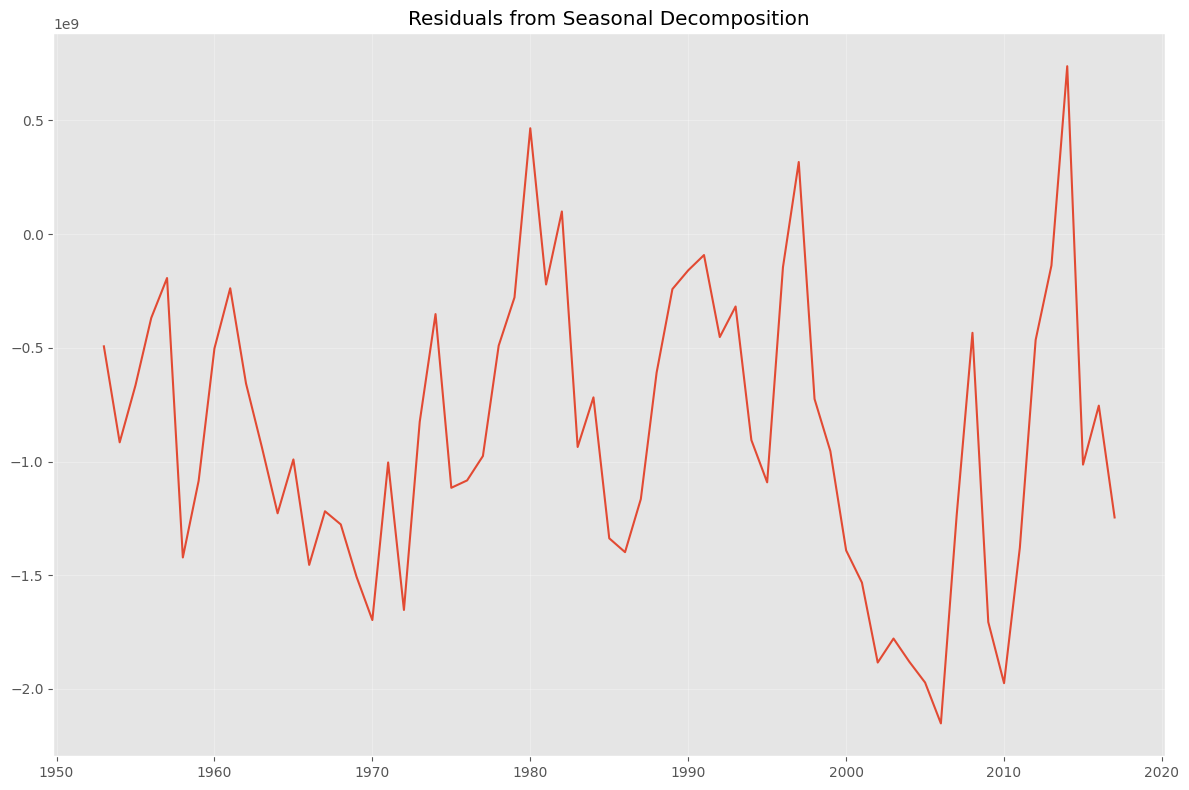


Augmented Dickey-Fuller Test (Residuals)
ADF Statistic: -4.0068
p-value: 0.001376
Result: Stationary


<Figure size 1200x500 with 0 Axes>

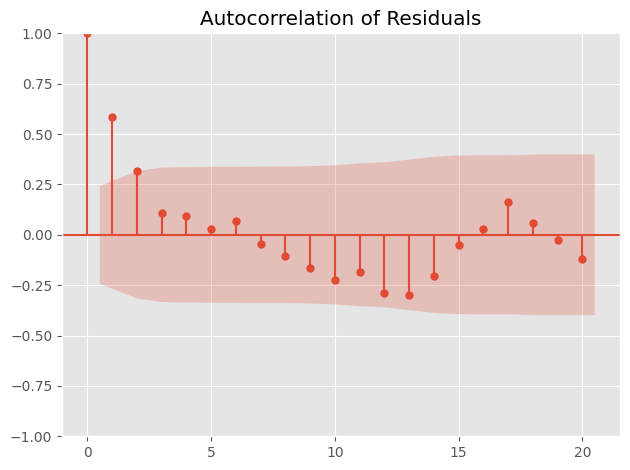


RESIDUALS:
   - Stationarity: Stationary
   - Contribution to variance: 0.00%


In [60]:
plt.figure(figsize=(12, 8))
# Plot residuals
plt.plot(decomposition.resid.dropna())
plt.title('Residuals from Seasonal Decomposition')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Test residuals for stationarity
print("\nAugmented Dickey-Fuller Test (Residuals)")
adf_resid_result = adfuller(decomposition.resid.dropna())
print(f"ADF Statistic: {adf_resid_result[0]:.4f}")
print(f"p-value: {adf_resid_result[1]:.6f}")
print(f"Result: {'Stationary' if adf_resid_result[1] < 0.05 else 'Non-stationary'}")

# Test residuals for autocorrelation
plt.figure(figsize=(12, 5))
sm.graphics.tsa.plot_acf(decomposition.resid.dropna(), lags=20, alpha=0.05)
plt.title('Autocorrelation of Residuals')
plt.tight_layout()
plt.show()

print("\nRESIDUALS:")
print(f"   - Stationarity: {'Stationary' if adf_resid_result[1] < 0.05 else 'Non-stationary'}")
print(f"   - Contribution to variance: {residual_var/total_var*100:.2f}%")
print("=====================================================")

The **residuals are stationary**, indicating that the model captures all essential information from the data. Additionally, the residuals resemble **white noise**, meaning they do not exhibit any systematic pattern or structure.  

This is a positive sign for forecasting, as it suggests that the model effectively explains the variance in emissions, leaving only random, unpredictable fluctuations in the residuals.  


In [61]:
def evaluate_predictor(predictor):
    # Filter out NaN values
    train_data = train_df.dropna(subset=[predictor, 'CO2 emission (Tons)'])
    test_data = test_df.dropna(subset=[predictor, 'CO2 emission (Tons)'])
    
    # Create and train linear regression model
    model = LinearRegression()
    model.fit(train_data[[predictor]], train_data['CO2 emission (Tons)'])
    
    # Make predictions on test set
    predictions = model.predict(test_data[[predictor]])
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(test_data['CO2 emission (Tons)'], predictions))
    
    return rmse

train_df = df_post_1950[df_post_1950['Year'] <= 2010]
test_df = df_post_1950[df_post_1950['Year'] > 2010]

# Evaluate both predictors
area_eval = evaluate_predictor('Area')
pct_eval = evaluate_predictor('% of World')

better_predictor = 'Area' if area_eval < pct_eval else '% of World'

print("\n Area vs % of World:")
print(f"Based on predictive performance, '{better_predictor}' is the better predictor for CO2 emissions forecasting from 1950 onwards.")
print(f"RMSE for Area: {area_eval:.4f}, RMSE for % of World: {pct_eval:.4f}")



 Area vs % of World:
Based on predictive performance, '% of World' is the better predictor for CO2 emissions forecasting from 1950 onwards.
RMSE for Area: 28984154808.4874, RMSE for % of World: 27955217575.2883


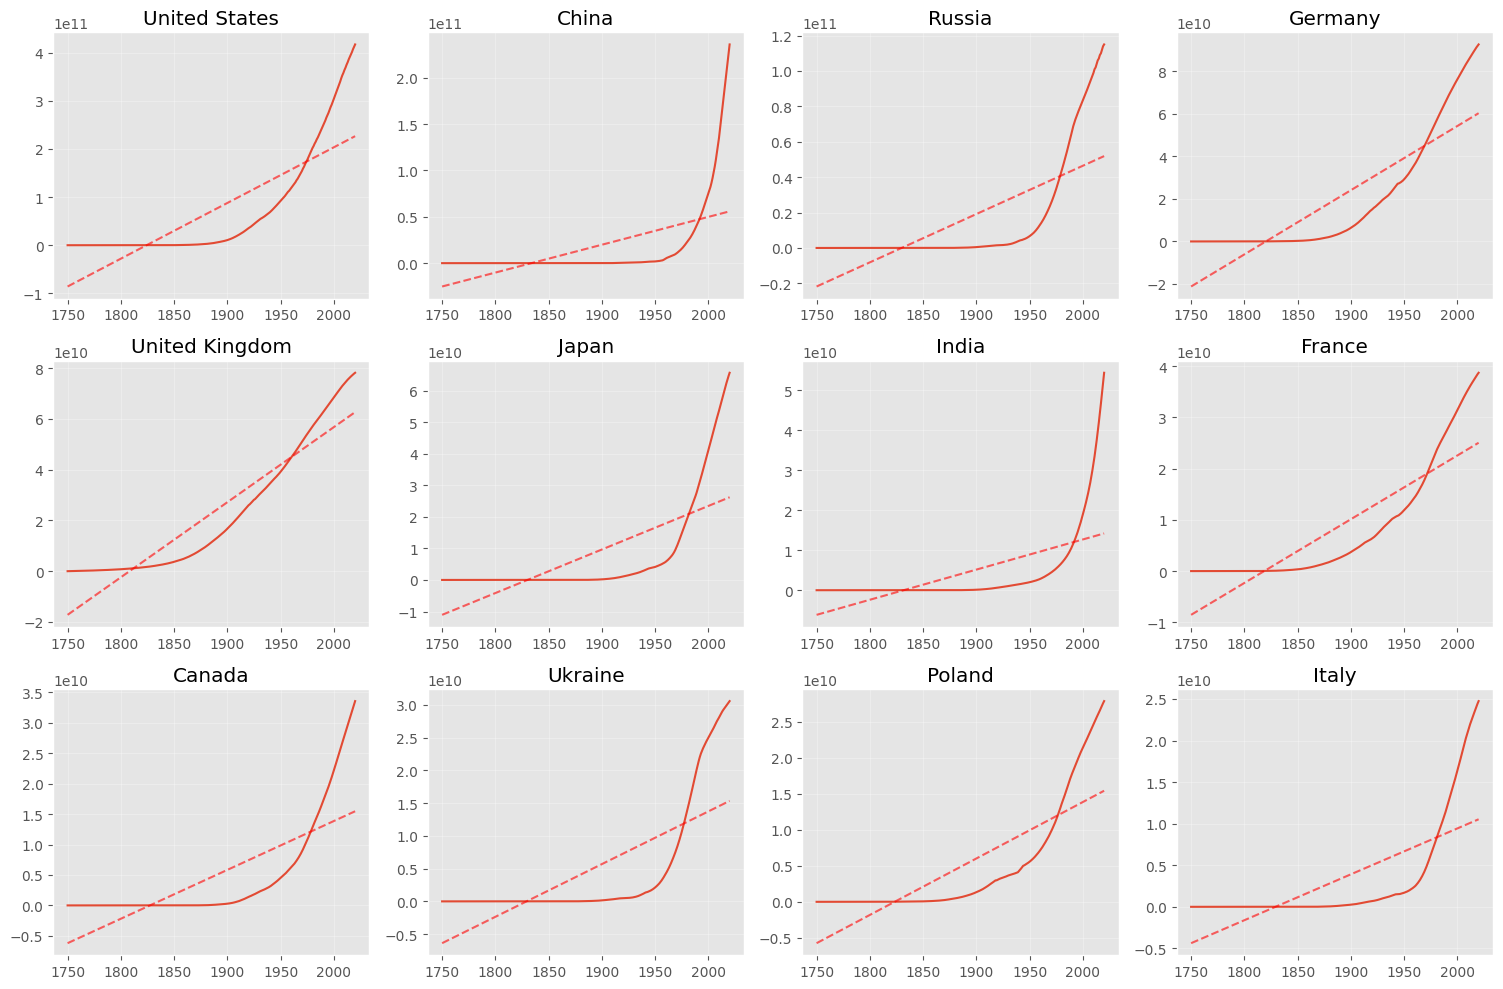

In [62]:
# Analyze trajectory of top emitters
# -----------------------------------------

# Get top 12 countries by CO2 emissions in 2020
top_emitters = df[df['Year'] == 2020].sort_values(by='CO2 emission (Tons)', ascending=False).head(12)['Country'].unique().tolist()

# Create a plot for each top emitter
plt.figure(figsize=(15, 10))

for i, country in enumerate(top_emitters, 1):
    country_data = df[df['Country'] == country].sort_values('Year')
    
    plt.subplot(3, 4, i)
    plt.plot(country_data['Year'], country_data['CO2 emission (Tons)'])
    plt.title(country)
    plt.grid(True, alpha=0.3)
    x = np.arange(len(country_data))
    y = country_data['CO2 emission (Tons)'].values
    slope, intercept, _, _, _ = stats.linregress(x, y)
    plt.plot(country_data['Year'], intercept + slope * x, 'r--', alpha=0.6)

plt.tight_layout()
plt.show()

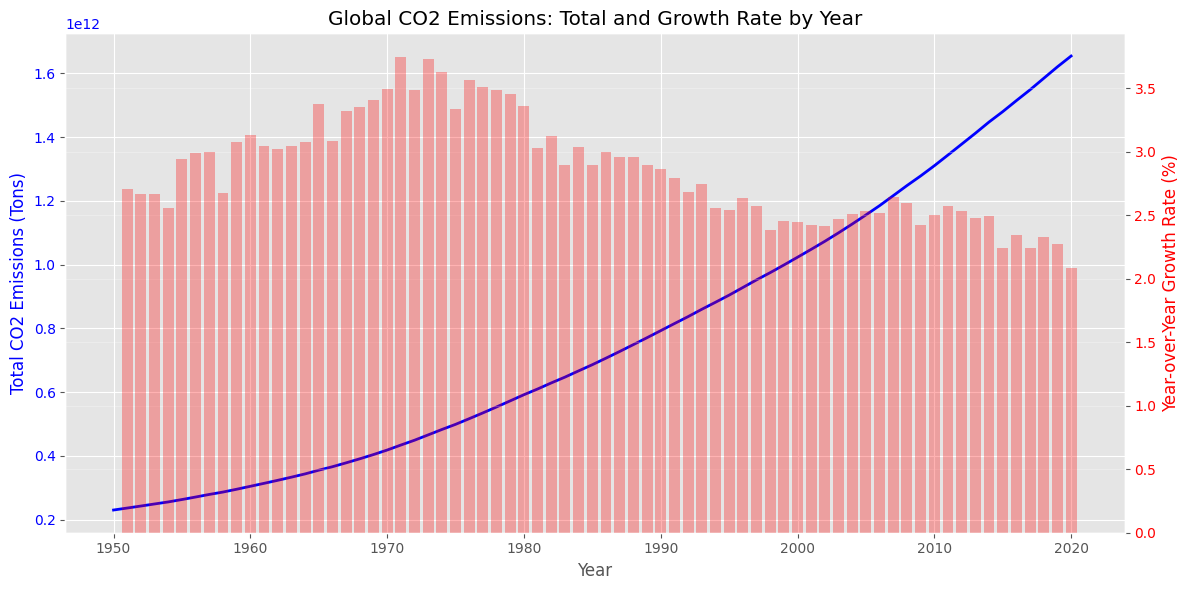

In [63]:
yearly_emissions = df[df['Year'] >= 1950].groupby('Year')['CO2 emission (Tons)'].sum().reset_index()
yearly_emissions['Growth'] = yearly_emissions['CO2 emission (Tons)'].pct_change() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(yearly_emissions['Year'], yearly_emissions['CO2 emission (Tons)'], 'b-', linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total CO2 Emissions (Tons)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2.bar(yearly_emissions['Year'], yearly_emissions['Growth'], alpha=0.3, color='r')
ax2.set_ylabel('Year-over-Year Growth Rate (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Global CO2 Emissions: Total and Growth Rate by Year')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [64]:
df[df['% of World'] == np.inf]

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),Log CO2 emission (Tons),Calling Code Group,First Digit,Two First Digits


In [65]:
year_corrs = []
for year in sorted(df['Year'].unique()):
    year_data = df[df['Year'] == year]
    
    # Remove rows with NaN or inf values in the relevant columns
    year_data_clean = year_data[
        year_data['% of World'].notna() & year_data['CO2 emission (Tons)'].notna() &
        np.isfinite(year_data['% of World']) & np.isfinite(year_data['CO2 emission (Tons)'])
    ]
    corr, pval = stats.pearsonr(year_data_clean['% of World'], year_data_clean['CO2 emission (Tons)'])
    year_corrs.append({
        'Year': year,
        'Correlation': corr,
        'P-value': pval,
        'Significant': pval < 0.05,
        'Sample Size': len(year_data_clean)
    })

year_corr_df = pd.DataFrame(year_corrs)

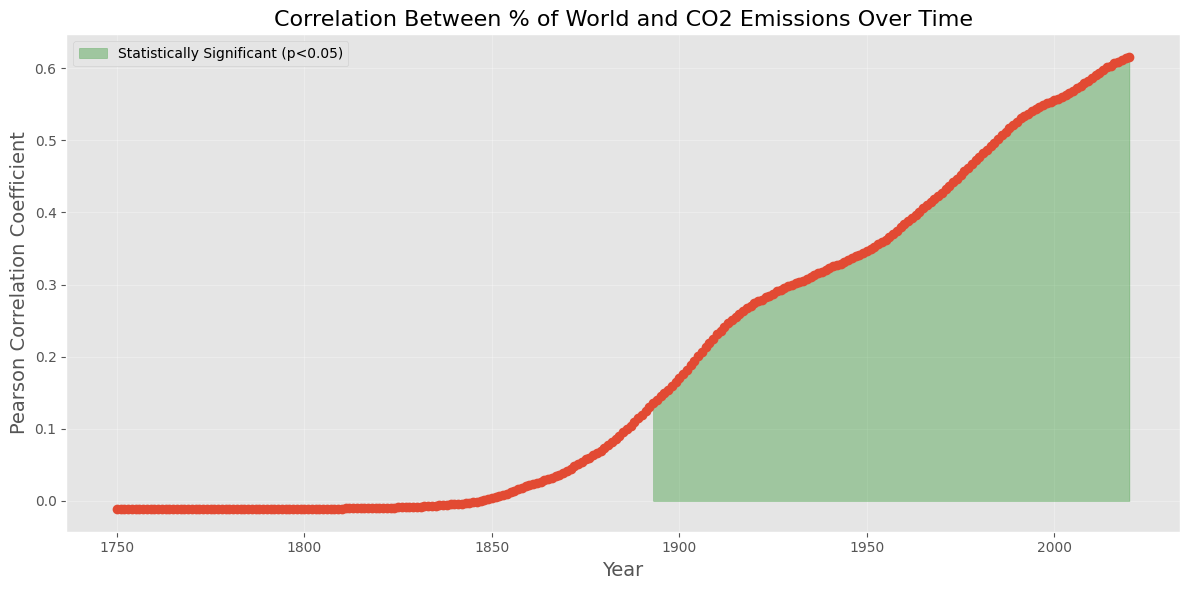

In [66]:

plt.figure(figsize=(12, 6))
plt.plot(year_corr_df['Year'], year_corr_df['Correlation'], marker='o', linestyle='-')
plt.fill_between(year_corr_df['Year'], year_corr_df['Correlation'], 
                where=(year_corr_df['Significant']), color='green', alpha=0.3, 
                label='Statistically Significant (p<0.05)')
plt.title('Correlation Between % of World and CO2 Emissions Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Pearson Correlation Coefficient', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

/Users/omar/Perso/smway-forecasting/.venv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


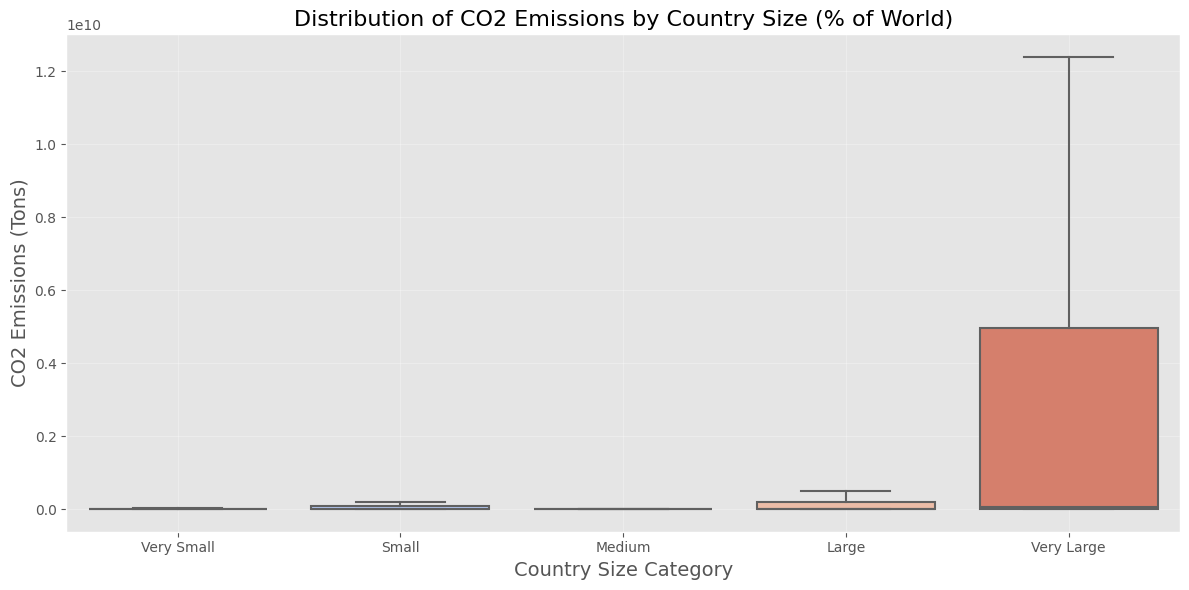

In [67]:
df_clean = df.dropna(subset=['CO2 emission (Tons)'])
df_clean['Size_Category'] = pd.cut(df_clean['% of World'], 
                                 bins=[0, 0.1, 0.5, 1, 5, 100],
                                 labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
# Ensure categories are explicitly defined and ordered
df_clean['Size_Category'] = pd.Categorical(df_clean['Size_Category'], 
                                           categories=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'], 
                                           ordered=True)

# Boxplot with corrected categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Size_Category', y='CO2 emission (Tons)', data=df_clean, showfliers=False, palette='coolwarm')

plt.title('Distribution of CO2 Emissions by Country Size (% of World)', fontsize=16)
plt.xlabel('Country Size Category', fontsize=14)
plt.ylabel('CO2 Emissions (Tons)', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


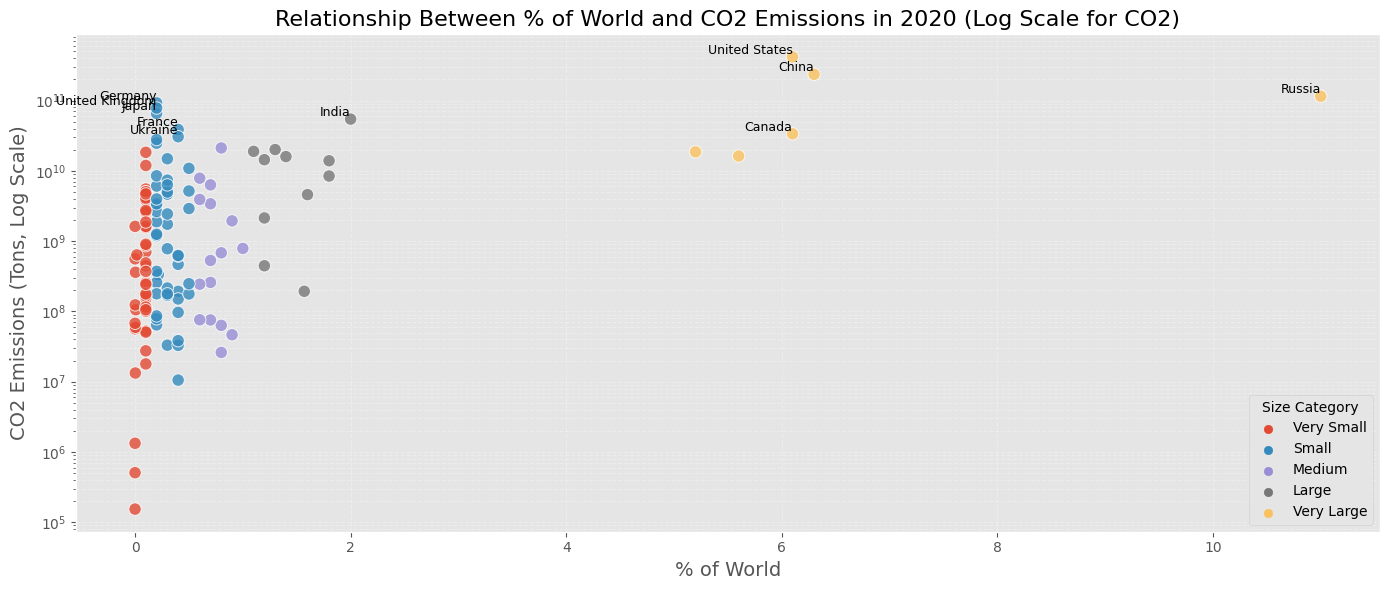

In [68]:
recent_year = df_clean['Year'].max()
recent_data = df_clean[df_clean['Year'] == recent_year].copy()

eps = 1e-6
recent_data = recent_data[recent_data['CO2 emission (Tons)'] > 0]

plt.figure(figsize=(14, 6))

sns.scatterplot(data=recent_data, x='% of World', y='CO2 emission (Tons)', 
                hue='Size_Category', alpha=0.8, s=80)

top_n = 10
for _, row in recent_data.nlargest(top_n, 'CO2 emission (Tons)').iterrows():
    plt.text(row['% of World'], row['CO2 emission (Tons)'], row['Country'], 
             fontsize=9, ha='right', va='bottom')

plt.yscale('log')

plt.title(f'Relationship Between % of World and CO2 Emissions in {recent_year} (Log Scale for CO2)', fontsize=16)
plt.xlabel('% of World', fontsize=14)
plt.ylabel('CO2 Emissions (Tons, Log Scale)', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.3)

plt.legend(title="Size Category")
plt.tight_layout()
plt.show()


/Users/omar/Perso/smway-forecasting/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


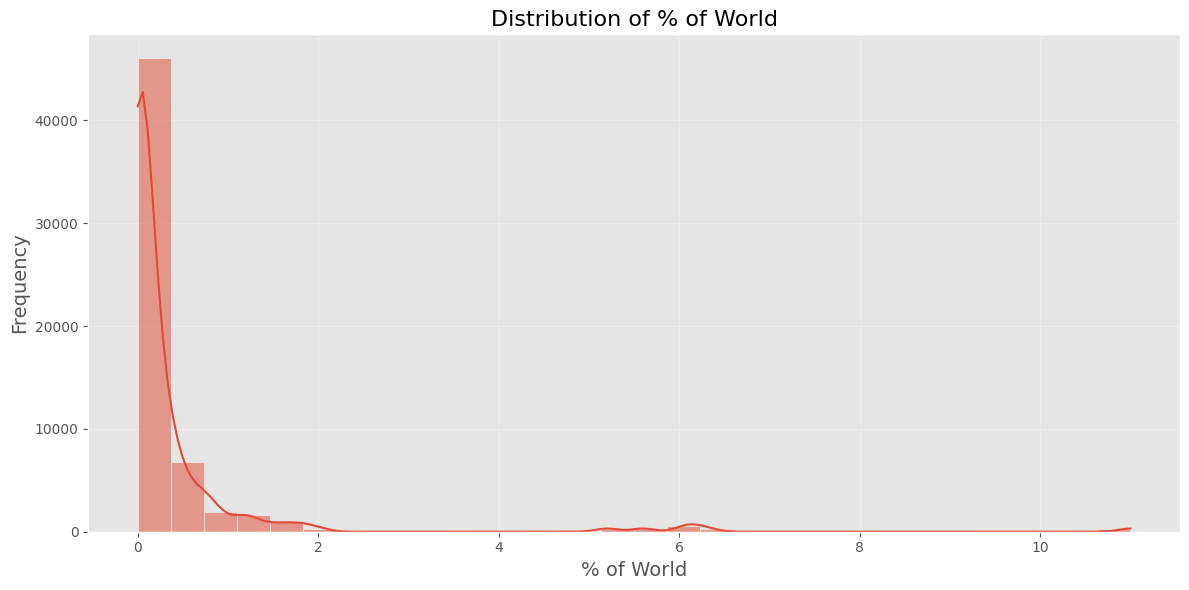

/Users/omar/Perso/smway-forecasting/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


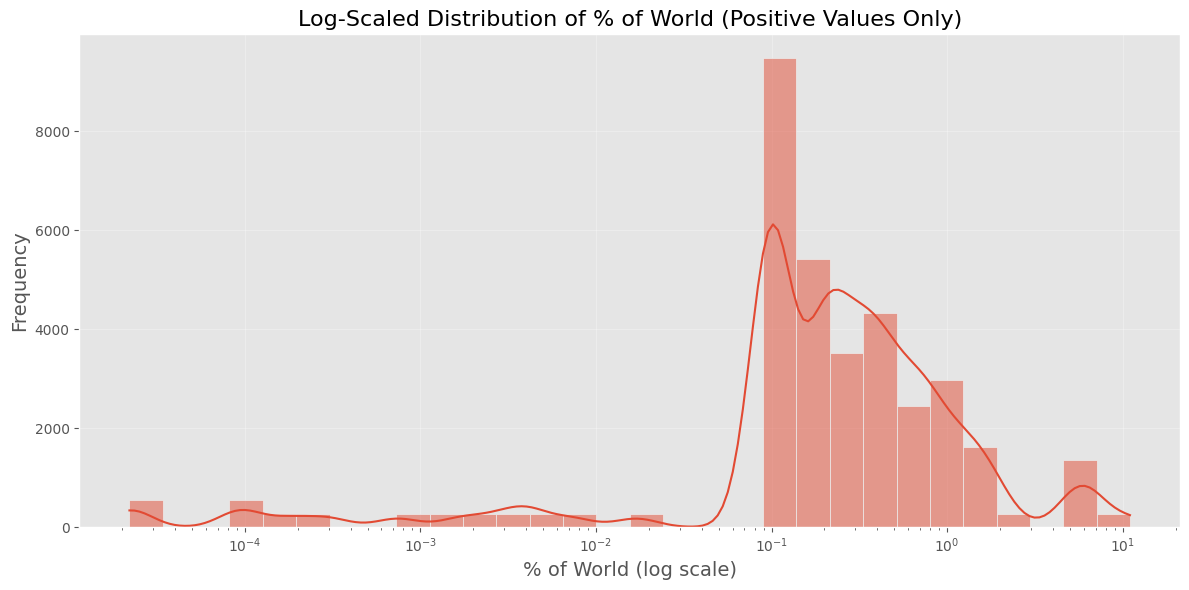

In [69]:
df_clean = df.dropna(subset=['% of World'])

# 1. Distribution Visualization
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['% of World'], kde=True, bins=30)
plt.title('Distribution of % of World', fontsize=16)
plt.xlabel('% of World', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Log-scaled Distribution (handling zeros and negative values)
plt.figure(figsize=(12, 6))
# Filter to positive values for log scale
log_data = df_clean[df_clean['% of World'] > 0]['% of World']
sns.histplot(log_data, kde=True, bins=30, log_scale=True)
plt.title('Log-Scaled Distribution of % of World (Positive Values Only)', fontsize=16)
plt.xlabel('% of World (log scale)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The influence of country size became more pronounced after 1950, as large countries like Russia, China, and the USA grew into economic powers. This contrasts with the period before 1900, when emissions were dominated by relatively small Western European countries.  

To better forecast emissions for 2021 and beyond, we conclude that using data after 1950 provides a more accurate representation of global emissions trends.  

Total countries in dataset after 1950: 220
Countries with complete data: 168
Countries with some missing data: 52
Countries with >50% missing data: 15

Top 20 countries with highest percentage of missing emissions data:
                      Country  Pct_Missing_Data  Years_With_Data  Total_Years
102                    Kosovo         81.690141               13           71
197                     Timor         73.239437               19           71
216         Wallis and Futuna         71.830986               20           71
127                Micronesia         59.154930               29           71
121          Marshall Islands         59.154930               29           71
135                   Namibia         57.746479               30           71
205                    Tuvalu         56.338028               31           71
151                 Palestine         56.338028               31           71
108                   Lesotho         56.338028               31           71


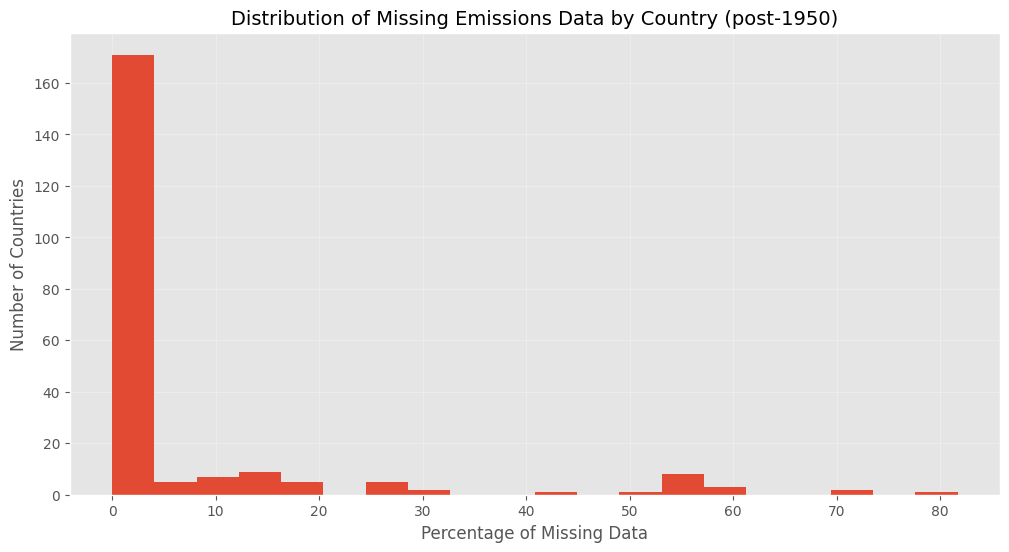

In [70]:
df_post_1950 = df[df['Year'] >= 1950].copy()

max_year = df_post_1950['Year'].max()
total_years = max_year - 1950 + 1

countries = df_post_1950['Country'].unique()

missing_data = []

for country in countries:
    country_data = df_post_1950[df_post_1950['Country'] == country]
    
    years_with_data = country_data[(country_data['CO2 emission (Tons)'] > 0) & 
                                  (~country_data['CO2 emission (Tons)'].isna())]['Year'].nunique()
    
    years_with_zero = country_data[country_data['CO2 emission (Tons)'] == 0]['Year'].nunique()
    
    years_with_null = country_data[country_data['CO2 emission (Tons)'].isna()]['Year'].nunique()
    
    years_missing = total_years - years_with_data - years_with_zero - years_with_null
    
    pct_years_missing = (years_missing / total_years) * 100
    pct_data_missing = ((years_missing + years_with_null + years_with_zero) / total_years) * 100
    
    missing_data.append({
        'Country': country,
        'Years_With_Data': years_with_data,
        'Years_With_Zero': years_with_zero,
        'Years_With_Null': years_with_null,
        'Years_Missing': years_missing,
        'Total_Years': total_years,
        'Pct_Missing_Years': pct_years_missing,
        'Pct_Missing_Data': pct_data_missing
    })

missing_df = pd.DataFrame(missing_data)
missing_df = missing_df.sort_values('Pct_Missing_Data', ascending=False)

print(f"Total countries in dataset after 1950: {len(countries)}")
print(f"Countries with complete data: {len(missing_df[missing_df['Pct_Missing_Data'] == 0])}")
print(f"Countries with some missing data: {len(missing_df[missing_df['Pct_Missing_Data'] > 0])}")
print(f"Countries with >50% missing data: {len(missing_df[missing_df['Pct_Missing_Data'] > 50])}")

print("\nTop 20 countries with highest percentage of missing emissions data:")
print(missing_df[['Country', 'Pct_Missing_Data', 'Years_With_Data', 'Total_Years']].head(20))

plt.figure(figsize=(12, 6))
plt.hist(missing_df['Pct_Missing_Data'], bins=20)
plt.title('Distribution of Missing Emissions Data by Country (post-1950)', fontsize=14)
plt.xlabel('Percentage of Missing Data', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## Preprocessing

### Prepare Data

In [89]:
df = pd.read_csv('../data/CO2 emission by countries.csv', encoding='cp1252')
df['Calling Code'] = df['Calling Code'].str.replace('-', '')
df['Calling Code'] = df['Calling Code'].str.split(',').str[0]
df['Calling Code'] = pd.to_numeric(df['Calling Code'])
df['% of World'] = df['% of World'].str.replace('%', '', regex=False).apply(pd.to_numeric)

**Calling Code and % of World**
   - `Calling Code` is converted to a numeric format.
   - `% of World` is also turned into a numeric value.

### Impute missing Value

#### Impute Calling Code, % of World

In [90]:
prct_world = {
    'Antarctica': 0.0001,
    'Brunei': 0.0039,
    'Cape Verde': 0.0027,
    'Christmas Island': 0.00009,
    "Cote d'Ivoire": 0.216,
    'Curacao': 0.00030,
    'Democratic Republic of Congo': 1.57,
    'Hong Kong': 0.00074,
    'Kosovo': 0.0073,
    'Macao': 0.000022,
    'North Macedonia': 0.017,
    'Palestine': 0.0042,
    'Reunion': 0.0017,
    'Sint Maarten (Dutch part)': 0.000023,
    'Timor (East Timor)': 0.010,
    'Wallis and Futuna': 0.00018
}
for country, value in prct_world.items():
    df.loc[df['Country'] == country, '% of World'] = value

In [91]:
calling_codes = {
    'Congo': 242,
    "Cote d'Ivoire": 225,
    'Czechia': 420,
    'Democratic Republic of Congo': 243,
    'Eswatini': 268,
    'Faeroe Islands': 298,
    'French Guiana': 594,
    'Guadeloupe': 590,
    'Macao': 853,
    'Martinique': 596,
    'North Macedonia': 389,
    'Sint Maarten (Dutch part)': 1721,
    'Timor': 670
}
for country, code in calling_codes.items():
    df.loc[df['Country'] == country, 'Calling Code'] = code



**Imputation of Missing Values**
   - Missing values for both `Calling Code` and `% of World` are imputed using real-world data.
   - For **Antarctica**, a low value is intentionally assigned to `% of World` due to its large size but relatively low emissions. This decision was informed by the **strong positive correlation between emissions and country size**, making it a suitable approach for handling Antarctica's data.



#### Impute CO2 Emissions

In [92]:
def impute_emissions_recursively(df):
    """
    Imputes missing or zero CO2 emission values by propagating values backward
    using global year-over-year emission growth rates.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with columns ['Country', 'Year', 'CO2 emission (Tons)'].
    
    Returns:
    pd.DataFrame: A copy of the original DataFrame with imputed values and an added 'Imputed' column.
    """
    df_imputed = df.copy()
    df_imputed['Imputed'] = df_imputed.get('Imputed', False)  # Track whether a value has been imputed
    
    # Compute global yearly CO2 emission growth rates
    global_progress_rates = (
        df.groupby('Year')['CO2 emission (Tons)']
        .sum()
        .pct_change()  # Compute percentage change year-over-year
        .dropna()
        .to_dict() 
    )
    
    max_iterations, total_imputed = 20, 0  # Limit iterations to prevent infinite loops
    countries = df['Country'].unique()  # Get list of unique countries
    
    # Iteratively impute missing values, stopping when no new imputations occur
    for iteration in range(1, max_iterations + 1):
        imputed_count = 0
        
        for country in countries:
            country_data = df_imputed[df_imputed['Country'] == country]
            
            # Identify missing years (either NaN or zero emissions)
            missing_years = country_data.loc[
                country_data['CO2 emission (Tons)'].le(0) | country_data['CO2 emission (Tons)'].isna(), 'Year'
            ].sort_values(ascending=False)  # Sort from most recent to oldest
            
            for year in missing_years:
                # Get data for the next year (year + 1) in the same country
                next_year_data = df_imputed[
                    (df_imputed['Country'] == country) & (df_imputed['Year'] == year + 1)
                ]
                
                # Ensure there is valid next-year data to use for imputation
                if not next_year_data.empty and next_year_data['CO2 emission (Tons)'].iloc[0] > 0:
                    progress_rate = global_progress_rates.get(year, 0)  # Get growth rate for this year (default to 0)
                    imputed_value = next_year_data['CO2 emission (Tons)'].iloc[0] / (1 + progress_rate)  # Estimate
                    
                    # Update DataFrame with imputed value and mark as imputed
                    update_mask = (df_imputed['Country'] == country) & (df_imputed['Year'] == year)
                    df_imputed.loc[update_mask, ['CO2 emission (Tons)', 'Imputed']] = imputed_value, True
                    imputed_count += 1
        
        total_imputed += imputed_count
        print(f"Iteration {iteration}: Imputed {imputed_count} values")
        
        if imputed_count == 0:
            break  # Stop early if no new imputations occur
    
    print(f"Total imputed values: {total_imputed}")
    return df_imputed


**Imputation of Missing CO₂ Emissions**
   - Missing or zero CO₂ emission values (where emissions = 0) are imputed by propagating values backward using **global year-over-year emission growth rates**. This approach assumes that emissions tend to follow a global pattern and grow similarly across years.
   - To further improve the imputation process, we could refine it by considering **similar countries** in terms of factors such as area, calling code (e.g., the first digit), and emissions. By grouping countries in this way, we could compute the average emissions or growth rates for each group and use this to impute missing values.  


In [93]:
def calculate_trends(group):
    # Find the first year with emissions greater than 0 for the current country
    first_year_with_emissions = group[group["CO2 emission (Tons)"] > 0]["Year"].min()

    # Compute trend, trend_squared, and trend_exp based on the first year with emissions > 0
    group["trend"] = group["Year"] - first_year_with_emissions
    group["trend_squared"] = group["trend"] ** 2
    
    # Exponential growth with 2% per year
    group["trend_exp"] = (1.02) ** group["trend"]

    return group

The `calculate_trends` function is designed to extract trend-related features for forecasting CO2 emissions. It computes three key variables:

1. **trend**: The number of years since the first emission greater than zero.
2. **trend_squared**: The squared trend, capturing non-linear growth.
3. **trend_exp**: The exponential growth of emissions, assuming 2% growth per year.

For feature engineering, only **trend_squared** and **trend_exp** are used, as they help capture the non-linear and exponential patterns in emissions over time.

In [94]:
df_filtered = df[df['Year'] >= 1950].copy()
df_filtered = df_filtered.groupby('Country').apply(calculate_trends).reset_index(drop=True)
missing_before = ((df_filtered['CO2 emission (Tons)'] == 0) | df_filtered['CO2 emission (Tons)'].isna()).sum()

df_imputed = impute_emissions_recursively(df_filtered)
missing_after = ((df_imputed['CO2 emission (Tons)'] == 0) | df_imputed['CO2 emission (Tons)'].isna()).sum()

print(f"Missing values before: {missing_before}")
print(f"Missing values after: {missing_after}")
print(f"Percentage filled: {(missing_before - missing_after) / missing_before * 100:.2f}%")

/var/folders/wm/q5f2cbh95hj16w74mp9sqq1c0000gn/T/ipykernel_72641/673094124.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered = df_filtered.groupby('Country').apply(calculate_trends).reset_index(drop=True)


Iteration 1: Imputed 1045 values
Iteration 2: Imputed 0 values
Total imputed values: 1045
Missing values before: 1045
Missing values after: 0
Percentage filled: 100.00%


#### Feature engineering

In [95]:
# remove puerto rico from df
df_imputed = df_imputed[df_imputed['Country'] != 'Puerto Rico']

In [96]:
df_imputed['Size_Category'] = pd.cut(df_imputed['% of World'], 
                                 bins=[0, 0.1, 0.5, 1, 5, 100],
                                 labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
df_imputed['First Digit'] = df['Calling Code'].astype(str).str[0]
df_imputed['Two First Digits'] = df['Calling Code'].astype(str).str[:2]
df_imputed['Log CO2 emission (Tons)'] = np.log1p(df['CO2 emission (Tons)'])
df_imputed['log_pct_world'] = np.log(df_imputed['% of World'] + 0.001)
df_imputed['calling_zone'] = np.where(df_imputed['Calling Code'] > 100, 0, 1)
# Create a mapping of country to first emission year
first_emission_years = df[df['CO2 emission (Tons)'] > 0].groupby('Country')['Year'].min()

# Add the column to the original DataFrame
df_imputed['first_emission_year'] = df_imputed['Country'].map(first_emission_years)

1. **Size Category**
   - We create a new feature, **`size_category`**, by grouping countries into categories such as "Very Large," "Large," etc., based on their **% of World** value. This helps capture the influence of country size on emissions.

2. **Region Based on Calling Code**
   - The **first digit** of the **calling code** is used to represent the **region**. This provides a regional context to the data, helping the model account for geographical patterns.

3. **Two First Digits of Calling Code**
   - We use the **first two digits** of the **calling code** to create a more detailed **regional classification**, adding an additional layer of granularity.

4. **Log of CO₂ Emissions**
   - We apply a **log transformation** to CO₂ emissions to better handle the **big differences in emission levels** across countries.

5. **Calling Zone**
   - We define a new feature, **`calling_zone`**, which is set to:
     - `0` for countries with **calling codes 100 and above**, representing lower-emission countries, though some Eastern European countries with high emissions may fall into this category.
     - `1` for countries with **calling codes less than 100**, typically indicating more established economies and higher emitters.  


##### Encode

In [97]:
def encode_categorical(df, column):
    label_encoder = LabelEncoder()
    df[f'{column}_encoded'] = label_encoder.fit_transform(df[column])
    df = df.drop(columns=[column])  # Drop the original categorical column to avoid confusion
    return df, label_encoder

6. **Categorical Variable Encoding**
   - We use **LabelEncoder** from **scikit-learn** to encode all categorical variables. 

##### Split train/test

In [98]:
def split_data(df, year_column, split_year):
    train = df[df[year_column] < split_year].copy()
    test = df[df[year_column] >= split_year].copy()
    return train, test

##### Detrend functions

In [99]:
def detrend(train, test, target_column, group_column):
    means = train.groupby(group_column)[target_column].mean().reset_index()
    stds = train.groupby(group_column)[target_column].std().reset_index()

    means.columns = [group_column, f'{target_column}_mean']
    stds.columns = [group_column, f'{target_column}_std']
    
    train = train.merge(means, on=group_column, how='left')
    train = train.merge(stds, on=group_column, how='left')
    test = test.merge(means, on=group_column, how='left')
    test = test.merge(stds, on=group_column, how='left')
    
    train[f'{target_column}_std'] = train[f'{target_column}_std'].replace(0, 1)
    test[f'{target_column}_std'] = test[f'{target_column}_std'].replace(0, 1)
    
    train[f'{target_column}_detrend'] = (train[target_column] - train[f'{target_column}_mean']) / train[f'{target_column}_std']
    test[f'{target_column}_detrend'] = (test[target_column] - test[f'{target_column}_mean']) / test[f'{target_column}_std']
    
    return train, test

**Z-Score Detrending**
   - We apply a **z-score detrending method** to capture the trend in the data before forecasting. To avoid data leakage, the **mean and variance** for the detrending are computed only on the **training dataset** and are then used for the **test dataset** during forecasting.

##### Lagging

In [100]:
def create_lag_features(df, group_column, target_column, lags):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df.groupby(group_column)[target_column].shift(lag)
    return df.dropna()

## Modeling

In [101]:
def has_consecutive_years(order_years):
    if not order_years:
        return False
    sorted_years = sorted(order_years)
    for i in range(len(sorted_years) - 1):
        if sorted_years[i + 1] - sorted_years[i] != 1:
            return False
    
    return True

In [102]:
class MovingAverageBaseline:
    def __init__(self, window, yearly_increase=0.02):
        self.window = window
        self.yearly_increase = yearly_increase
    
    def fit(self, data):
        pass
    
    def transform(self, data, test, year,n_lags=2):        
        X_forecast = test.copy()
        X_forecast['forecast'] = np.nan 
        
        # Iterate through each country in the data
        for country, country_data in data.groupby("Country"):
            # Get the last `n_lags` data points for the country (i.e., the most recent years)
            country_data = country_data.tail(n_lags)
            years = np.arange(len(country_data))  # Use years based on the n_lags data
            
            # Remove global trend (detrend)
            detrended_data = country_data["CO2 emission (Tons)"] / (1 + self.yearly_increase) ** years
            
            # Compute moving average
            ma_forecast = detrended_data.rolling(window=self.window, min_periods=1).mean()
            
            # Reapply the global trend (add back the yearly increase)
            forecast = ma_forecast.iloc[-1] * (1 + self.yearly_increase) ** (years[-1] + 1)
            
            # Store the forecast in the X_forecast DataFrame for the given country and year
            X_forecast.loc[(X_forecast['Country'] == country) & (X_forecast['Year'] == year), 'forecast'] = forecast
        
        return X_forecast

In [103]:
def train_model(X, y, params, num_boost_round):
    params['log_level'] = 'error' 
    params['verbose'] = -1
    lgb_train = lgb.Dataset(X, label=y)
    model = lgb.train(params, lgb_train, num_boost_round=num_boost_round)
    
    # Extract feature importance
    feature_importance = model.feature_importance(importance_type='split') 
    feature_names = X.columns
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    })
    
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
        
    return model, importance_df


**Modeling Approach**

We will use two models for forecasting:

1. **Moving Average**: This will serve as a baseline model. We set up a simple yet effective method that integrates a basic detrending technique, helping to capture overall trends in the data.

2. **LightGBM**: We will use **LightGBM**, which has shown to outperform most models, including **XGBoost**, based on findings from the M5 competition summary papers. LightGBM's ability complex relationships makes it a strong candidate for forecasting CO2 emissions.

We will primarily use **RMSE** as the evaluation metric. RMSE is a good choice for several reasons:
   - **Sensitive to large errors**: It penalizes large deviations more than smaller ones, anticipating than error will be more important for small emitters.
   - **Interpretability**: RMSE is expressed in the same unit as CO2 emissions.


In [104]:
def recursive_forecast(model, test_df, feature_cols, year_col, target_col, lag, country_column, detrend_method='zscore'):
    forecast = []
    
    test_df['forecast'] = np.nan

    for i, year in enumerate(test_df[year_col].unique()):
        year_mask = test_df[year_col] == year
        X_test = test_df.loc[year_mask, feature_cols]

        if i > 0:
            for lag_idx in range(1, min(i+1, lag+1)):
                prev_year = year - lag_idx
                prev_forecasts = test_df[test_df[year_col] == prev_year].set_index(country_column)['forecast'].to_dict()

                for country in test_df.loc[year_mask, country_column]:
                    if country in prev_forecasts:
                        X_test.loc[test_df.loc[year_mask, country_column] == country, f'lag_{lag_idx}'] = prev_forecasts[country]
                    else:
                        X_test.loc[test_df.loc[year_mask, country_column] == country, f'lag_{lag_idx}'] = X_test.loc[test_df.loc[year_mask, country_column] == country, f'lag_{lag_idx}'].mean()

        # Get prediction from the model
        forecast_values = model.predict(X_test)

        # Save the forecast predictions for the current year only
        test_df.loc[year_mask, 'forecast'] = forecast_values
        forecast.append(forecast_values)

    forecast_df = test_df[[year_col, country_column, 'forecast']].drop_duplicates()

    if detrend_method == 'zscore':
        forecast_df = forecast_df.merge(
            test_df[['Country_encoded', 'Year', f'{target_col}_mean', f'{target_col}_std']].drop_duplicates(subset=['Country_encoded', 'Year']), 
            on=['Country_encoded', 'Year'], 
            how='left'
        )
        # Apply inverse detrending
        forecast_df['forecast'] = forecast_df['forecast'] * forecast_df[f'{target_col}_std'] + forecast_df[f'{target_col}_mean']

    
    return forecast_df, model


In [105]:
def direct_forecast(X_train, y_train, X_test, feature_column, year_col,lgb_params, country_col='Country_encoded'):
    order_years = sorted(X_test['Year'].unique())
    train_max_year = X_train['Year'].max()
    
    year_consecutive_check = order_years + [train_max_year]
    X_forecast = X_test.copy()
    X_forecast['forecast'] = np.nan

    if not has_consecutive_years(year_consecutive_check):
        raise ValueError("Order years must be consecutive")
    model = None
    # Direct forecasting
    # Only work for two years ahead
    X_train_ = X_train[feature_column].copy()
    feat_imp = None
    for i, year in enumerate(order_years):
        model, feat_imp = train_model(X_train_, y_train, lgb_params, 200)
        year_mask = X_forecast[year_col] == year
        current_features = X_forecast[year_mask][feature_column]
        if i > 0:
            for country in current_features[country_col].unique():
                previous_forecast = X_forecast.loc[
                    (X_forecast[country_col] == country) & (X_forecast['Year'] == year - 1),
                    'forecast'
                ].values
                if previous_forecast.size > 0:
                    current_features.loc[current_features[country_col] == country, 'lag_1'] = previous_forecast[0]
        predictions = model.predict(current_features)
        X_forecast.loc[year_mask, 'forecast'] = predictions
        X_train_ = pd.concat([X_train_, X_forecast[year_mask][feature_column]])
        y_train = np.concatenate((y_train, predictions))

    return X_forecast, feat_imp


**Forecasting Methods**

We set up two forecasting methods: **Recursive Forecasting** and **Direct Forecasting**.

1. **Recursive Forecasting**: In this method, we first predict the emissions for the current year and then use that prediction as a feature to forecast emissions for the next year. This approach allows us to make predictions for multiple years ahead, as we continue using each year's prediction to inform the next.

2. **Direct Forecasting**: This method is a hybrid between direct and recursive forecasting. We first predict the emissions for the initial year in the list and add this prediction to the training data. Then, we rebuild the model using the updated dataset to predict emissions for the next year. Notably, the first-year prediction will serve as **lag_1** for the following year. This method is designed specifically for forecasting up to two years ahead.



#### Evaluation

In [107]:
def evaluate_model(y_true, y_pred, show=True):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    if show:
        print(f'RMSE: {rmse}\nMAE: {mae}\nR²: {r2}')
    return rmse, mae, r2

### Forecast

In [108]:

def plot_cv_results(years, rmse_scores, r2_scores):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot RMSE
    ax1.set_xlabel("Test Year")
    ax1.set_ylabel("RMSE", color="tab:blue")
    ax1.plot(years, rmse_scores, marker="o", linestyle="-", color="tab:blue", label="RMSE")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Create a second y-axis for R²
    ax2 = ax1.twinx()
    ax2.set_ylabel("R²", color="tab:red")
    ax2.plot(years, r2_scores, marker="s", linestyle="--", color="tab:red", label="R²")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Titles and legend
    plt.title("Cross-Validation Results: RMSE & R² Over Time")
    fig.tight_layout()
    plt.show()

#### Weighting Average Baseline

In [109]:
split_year = 2019
size = 20
target = 'CO2 emission (Tons)'
df_forecast = df_imputed.copy()
train, test = split_data(df_forecast, 'Year', split_year)
model = MovingAverageBaseline(window=2)
prediction = model.transform(train, test, split_year, n_lags=size )
y_true = prediction[prediction['Year'] == 2019]['CO2 emission (Tons)']
y_pred = prediction[prediction['Year'] == 2019]['forecast']
evaluate_model(y_true, y_pred)

RMSE: 762612567.506912
MAE: 138264822.11972725
R²: 0.9994944300317341


(762612567.506912, 138264822.11972725, 0.9994944300317341)

In [110]:
def cross_validate_moving_average(df, model, start_year=2010, end_year=2020, target='CO2 emission (Tons)', size=20):
    rmse_scores, mae_scores, r2_scores = [], [], []

    for split_year in range(start_year + 1, end_year + 1): 
        train, test = split_data(df, 'Year', split_year)  # Split data at each year
        prediction = model.transform(train, test, split_year, n_lags=size)

        y_true = prediction[prediction['Year'] == split_year][target]
        y_pred = prediction[prediction['Year'] == split_year]['forecast']

        rmse, mae, r2 = evaluate_model(y_true, y_pred, show=False)  # Compute metrics
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

    avg_rmse = np.mean(rmse_scores)
    avg_mae = np.mean(mae_scores)
    avg_r2 = np.mean(r2_scores)

    print(f"Cross-Validation Results (2010-2020):\nAverage RMSE: {avg_rmse}\nAverage MAE: {avg_mae}\nAverage R²: {avg_r2}")

    return avg_rmse, avg_mae, avg_r2, rmse_scores, mae_scores, r2_scores

# Initialize model
model = MovingAverageBaseline(window=2)

# Perform cross-validation
avg_rmse, avg_mae, avg_r2, rmse_list, mae_list, r2_list = cross_validate_moving_average(df_imputed, model, size=50)

Cross-Validation Results (2010-2020):
Average RMSE: 747883492.8370395
Average MAE: 132980014.21111926
Average R²: 0.9994365660688439


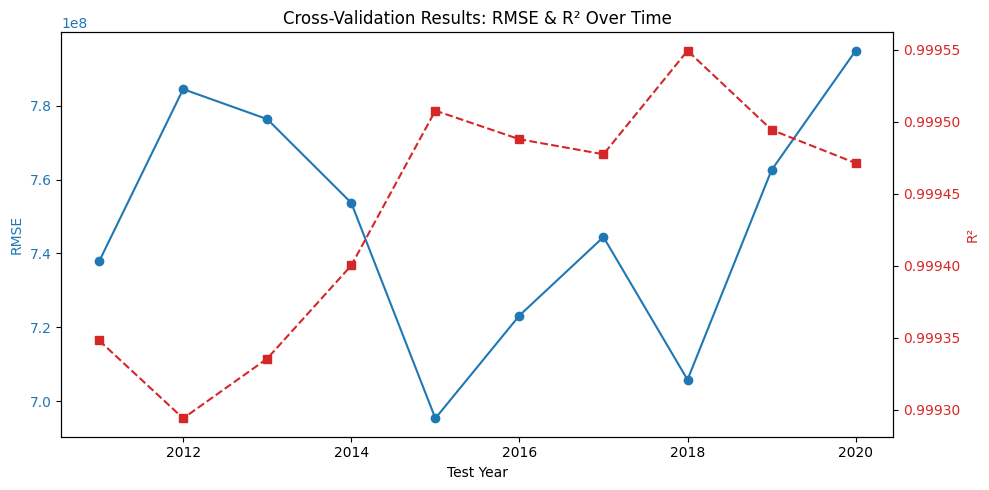

In [25]:
# Plot results
plot_cv_results(list(range(2011, 2021)), rmse_list, r2_list)

**Baseline Forecasting with Moving Average**

For 1-year-ahead forecasting, we use a **Moving Average** model as the baseline. The best results were obtained using a **window size of 2** to compute the next year's emissions.  

During cross-validation from **2010 to 2020**, the average **RMSE** was **747,883,492**, which will serve as our benchmark. Our goal is to improve upon this baseline through **feature engineering** and more advanced models like **LightGBM**.  


#### LightGBM

In [111]:
df_imputed.head(3)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),trend,trend_squared,trend_exp,Imputed,Size_Category,First Digit,Two First Digits,Log CO2 emission (Tons),log_pct_world,calling_zone,first_emission_year
0,Afghanistan,AF,93.0,1950,98928.0,41128771.0,652230.0,0.4,63/km²,0,0,1.0000,False,Small,9,93,0.0,-0.913794,1,1949
1,Afghanistan,AF,93.0,1951,190528.0,41128771.0,652230.0,0.4,63/km²,1,1,1.0200,False,Small,9,93,0.0,-0.913794,1,1949
2,Afghanistan,AF,93.0,1952,282128.0,41128771.0,652230.0,0.4,63/km²,2,4,1.0404,False,Small,9,93,0.0,-0.913794,1,1949


In [112]:
# Parameters
columns = ['Country', '% of World', 'Calling Code', 'Size_Category', 'First Digit', 'Two First Digits']
split_year = 2019
lag_years = 40
target = 'CO2 emission (Tons)'
lgb_params = {
    'objective': 'regression',
    'metric': 'l2',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'linear_tree': True
}
num_boost_round = 100
detrend_method = 'zscore'

# Workflow
df_forecast = df_imputed.copy()
df_forecast, country_encoder = encode_categorical(df_forecast, 'Country')
df_forecast, size_encoder = encode_categorical(df_forecast, 'Size_Category')
df_forecast, first_dgt_encoder = encode_categorical(df_forecast, 'First Digit')
df_forecast, two_dgt_encoder = encode_categorical(df_forecast, 'Two First Digits')

train, test = split_data(df_forecast, 'Year', split_year)
train, test = detrend(train, test, 'CO2 emission (Tons)', 'Country_encoded')
combined = pd.concat([train, test])

encoded_columns = [
    'Country_encoded', 'Size_Category_encoded', 'First Digit_encoded', 'Two First Digits_encoded', 
] 

combined = create_lag_features(combined, 'Country_encoded', target, lag_years)

train_lagged, test_lagged = split_data(combined, 'Year', split_year)

feature_cols = encoded_columns + [f'lag_{lag}' for lag in range(1, lag_years + 1)] + ['% of World', 'Calling Code']
X_train = train_lagged[feature_cols]
y_train = train_lagged[f'{target}_detrend']

# Train model
lgb_model, feature_importance = train_model(X_train, y_train, lgb_params, num_boost_round)

# Predict
forecast_df, lgb_model = recursive_forecast(
    lgb_model, test_lagged, feature_cols, 'Year', target, lag_years, 'Country_encoded'
)

y_pred_final = forecast_df['forecast'].values
y_test_array = test_lagged['CO2 emission (Tons)'].values
# Evaluate
evaluate_model(y_test_array, y_pred_final)

RMSE: 36311999819981.37
MAE: 2384478464475.9414
R²: -985839.5378013208


(36311999819981.37, 2384478464475.9414, -985839.5378013208)

In [113]:
# Parameters
columns = ['Country', '% of World', 'Size_Category', 'First Digit', 'Two First Digits']
split_year = 2019
lag_years = 40
target = 'CO2 emission (Tons)'
lgb_params = {
    'objective': 'regression',
    'metric': 'l2',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'linear_tree': True
}
num_boost_round = 100
detrend_method = None

# Workflow
df_forecast = df_imputed.copy()
df_forecast, country_encoder = encode_categorical(df_forecast, 'Country')
df_forecast, size_encoder = encode_categorical(df_forecast, 'Size_Category')
df_forecast, first_dgt_encoder = encode_categorical(df_forecast, 'First Digit')
df_forecast, two_dgt_encoder = encode_categorical(df_forecast, 'Two First Digits')
train, test = split_data(df_forecast, 'Year', split_year)
#train, test = detrend(train, test, 'CO2 emission (Tons)', 'Country_encoded')
combined = pd.concat([train, test])

encoded_columns = [
    'Country_encoded', 
    'First Digit_encoded',
] 
#encoded_columns = []

combined = create_lag_features(combined, 'Country_encoded', target, lag_years)
train_lagged, test_lagged = split_data(combined, 'Year', split_year)

# Prepare features: Use the encoded columns and lag features
feature_cols = encoded_columns + [f'lag_{lag}' for lag in range(1, lag_years + 1)] + ['% of World']
X_train = train_lagged[feature_cols]
y_train = train_lagged[target]

# Train model
lgb_model, importance_df = train_model(X_train, y_train, lgb_params, num_boost_round)


# Predict
forecast_df, lgb_model = recursive_forecast(
    lgb_model, test_lagged, feature_cols, 'Year', target, lag_years, 'Country_encoded', detrend_method=None
)

y_pred_final = forecast_df['forecast'].values
y_test_array = test_lagged['CO2 emission (Tons)'].values

# Evaluate
evaluate_model(y_test_array, y_pred_final)

RMSE: 601664880.9737319
MAE: 192394820.1983096
R²: 0.9997293452443928


(601664880.9737319, 192394820.1983096, 0.9997293452443928)

In [114]:
importance_df.head(10)

,Feature,Importance
2,lag_1,1420
3,lag_2,456
4,lag_3,190
5,lag_4,105
0,Country_encoded,102
8,lag_7,73
42,% of World,51
16,lag_15,49
7,lag_6,48
6,lag_5,44


For **LightGBM**, we generally use **2019 and 2020** as test data.  

A **recursive LightGBM model with Z-score detrending** resulted in **poorer performance**, with an RMSE of **around 35 trillion**, compared to the weighted average baseline. Forecasting on the **log-transformed emissions** also did not yield promising results.  

However, a **simpler recursive LightGBM model** (without detrending or log transformation) **outperformed the baseline**, achieving an RMSE of **around 600 million**. This confirms that keeping the model **simpler** leads to better performance.  

Additionally, setting **linear_tree = True** improved results by reducing RMSE from **around 800 million to 600 million**. This improvement is mainly due to LightGBM **capturing local linear trends**, which is well-suited for our problem.  

At this stage, we used **40 years of lag features** and did **not yet include trend-related features**.  


In [87]:
# Parameters
columns = ['Country', '% of World', 'Size_Category', 'First Digit', 'Two First Digits']
split_year = 2019
lag_years = 40
target = 'CO2 emission (Tons)'
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'linear_tree': True
}
num_boost_round = 100
detrend_method = None

# Workflow
df_forecast = df_imputed.copy()
df_forecast, country_encoder = encode_categorical(df_forecast, 'Country')
df_forecast, size_encoder = encode_categorical(df_forecast, 'Size_Category')
df_forecast, first_dgt_encoder = encode_categorical(df_forecast, 'First Digit')
df_forecast, two_dgt_encoder = encode_categorical(df_forecast, 'Two First Digits')
train, test = split_data(df_forecast, 'Year', split_year)

combined = pd.concat([train, test])
encoded_columns = [
    'Country_encoded', 
    'First Digit_encoded',
] 
#encoded_columns = []

combined = create_lag_features(combined, 'Country_encoded', target, lag_years)

train_lagged, test_lagged = split_data(combined, 'Year', split_year)

feature_cols = encoded_columns + [f'lag_{lag}' for lag in range(1, lag_years + 1)] + ['% of World', 'trend_squared', 'trend_exp','calling_zone', 'Calling Code', 'first_emission_year']
X_train = train_lagged[feature_cols]
y_train = train_lagged[target]


# Predict
forecast_df, feature_importance = direct_forecast(
    train_lagged, y_train, test_lagged, feature_cols,year_col='Year', lgb_params=lgb_params
)

y_pred_final = forecast_df['forecast'].values
y_test_array = test_lagged['CO2 emission (Tons)'].values
# Evaluate
evaluate_model(y_test_array, y_pred_final)

RMSE: 283533720.6992186
MAE: 122187296.70284644
R²: 0.9999398942845212


(283533720.6992186, 122187296.70284644, 0.9999398942845212)

In [89]:
# Parameters
columns = ['Country', '% of World', 'Size_Category', 'First Digit', 'Two First Digits']
split_year = 2019
lag_years = 40
target = 'CO2 emission (Tons)'
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'linear_tree': True,
}

num_boost_round = 100
detrend_method = None

# Workflow
df_forecast = df_imputed.copy()
df_forecast, country_encoder = encode_categorical(df_forecast, 'Country')
df_forecast, size_encoder = encode_categorical(df_forecast, 'Size_Category')
df_forecast, first_dgt_encoder = encode_categorical(df_forecast, 'First Digit')
df_forecast, two_dgt_encoder = encode_categorical(df_forecast, 'Two First Digits')

train, test = split_data(df_forecast, 'Year', split_year)
combined = pd.concat([train, test])
encoded_columns = [
    'Country_encoded', 
    'First Digit_encoded',
] 
#encoded_columns = []

# Create lag features for the encoded columns and target
combined = create_lag_features(combined, 'Country_encoded', target, lag_years)

# Split data after lag feature creation
train_lagged, test_lagged = split_data(combined, 'Year', split_year)

# Prepare features: Use the encoded columns and lag features
feature_cols = encoded_columns + [f'lag_{lag}' for lag in range(1, lag_years + 1)] + ['% of World']
X_train = train_lagged[feature_cols]
y_train = train_lagged[target]


# Predict
forecast_df, feature_importance = direct_forecast(
    train_lagged, y_train, test_lagged, feature_cols,year_col='Year', lgb_params=lgb_params)

y_pred_final = forecast_df['forecast'].values
y_test_array = test_lagged['CO2 emission (Tons)'].values
# Evaluate
evaluate_model(y_test_array, y_pred_final)
feature_importance.head(10)

RMSE: 247885726.43691823
MAE: 103791164.6268861
R²: 0.9999540580549753


,Feature,Importance
2,lag_1,1934
3,lag_2,637
4,lag_3,339
5,lag_4,270
0,Country_encoded,160
9,lag_8,147
8,lag_7,137
37,lag_36,128
6,lag_5,126
17,lag_16,118


**Direct Forecasting with Trend Features**  

Incorporating **trend-related features** such as **trend squared** and **trend exponential** significantly improved performance, bringing RMSE down to **around 288 million**.  

Our assumption that the **first emission year** plays a key role was validated, as adding this feature further reduced RMSE by **around 40 million**. This suggests that countries with earlier emission records are more likely to be developed nations, which helps in forecasting.  

For this performance, we used the following features:  
- **Country**  
- **First digit of calling code** (represents region)  
- **Lagged emissions** (up to 40 years, with optimal lag to be determined via cross-validation)  
- **% of World**  
- **Trend squared**  
- **Trend exponential**  
- **Calling zone**  
- **Calling code**  
- **First emission year**  

Further refinement showed **slightly better results** by keeping only:  
- **First digit of calling code**  
- **% of World**  
- **Country**  
- **Lagged emissions**  


### Cross Validation

In [80]:
def cross_validate(df, start_year=2014, end_year=2019, lag_years=40, target='CO2 emission (Tons)', lgb_params=None):
    results = []
    
    if lgb_params is None:
        lgb_params = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'linear_tree': True
        }
    
    df_forecast = df.copy()
    df_forecast, _ = encode_categorical(df_forecast, 'Country')
    df_forecast, _ = encode_categorical(df_forecast, 'Size_Category')
    df_forecast, _ = encode_categorical(df_forecast, 'First Digit')
    df_forecast, _ = encode_categorical(df_forecast, 'Two First Digits')
    
    for test_year in range(start_year, end_year):
        train = df_forecast[df_forecast['Year'] < test_year]
        test = df_forecast[(df_forecast['Year'] == test_year) | (df_forecast['Year'] == test_year + 1)]
        
        combined = pd.concat([train, test])
        combined = create_lag_features(combined, 'Country_encoded', target, lag_years)
        
        train_lagged = combined[combined['Year'] < test_year]
        test_lagged = combined[(combined['Year'] == test_year) | (combined['Year'] == test_year + 1)]
        
        feature_cols = [
            'Country_encoded', 'First Digit_encoded', '% of World', 'trend_squared', 
            'trend_exp', 'calling_zone', 'Calling Code', 'first_emission_year'
        ] + [f'lag_{lag}' for lag in range(1, lag_years + 1)]
        
        #X_train = train_lagged[feature_cols]
        y_train = train_lagged[target]
        
        forecast_df, lgb_model = direct_forecast(
            train_lagged, y_train, test_lagged, feature_cols, 
             year_col='Year',lgb_params=lgb_params
        )
        
        y_pred_final = forecast_df['forecast'].values
        y_test_array = test_lagged[target].values
        
        eval_result = evaluate_model(y_test_array, y_pred_final, False)
        results.append({'test_year': test_year, 'evaluation': eval_result})
        
    return results


In [81]:
results = cross_validate(df_imputed, start_year=2014, end_year=2020, lag_years=40, target='CO2 emission (Tons)', lgb_params=lgb_params)
for res in results:
    print(f"Test Year: {res['test_year']}, Evaluation: {res['evaluation']}")


Test Year: 2014, Evaluation: (1528347532.6858265, 286896277.82360446, 0.9978717624374573)
Test Year: 2015, Evaluation: (815169117.2480603, 175283819.4853866, 0.9994172751554308)
Test Year: 2016, Evaluation: (693158038.9030864, 166430387.17358086, 0.9995947067482535)
Test Year: 2017, Evaluation: (837130352.3584641, 181629475.73634878, 0.9994322241330481)
Test Year: 2018, Evaluation: (679921219.4591128, 169779945.12671104, 0.9996404291667912)
Test Year: 2019, Evaluation: (629618926.0872282, 166513188.04447997, 0.9997036111335679)


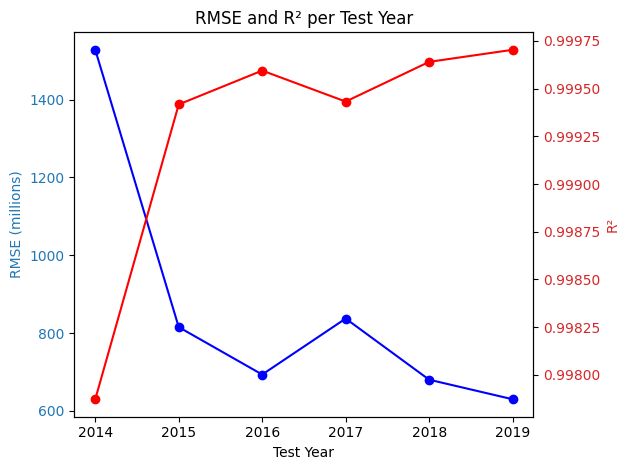

In [82]:
test_years = [res['test_year'] for res in results]
rmse_values = [res['evaluation'][0] for res in results]
r2_values = [res['evaluation'][2] for res in results]

fig, ax1 = plt.subplots()

# Plot RMSE on the left y-axis
ax1.set_xlabel('Test Year')
ax1.set_ylabel('RMSE (millions)', color='tab:blue')
ax1.plot(test_years, [rmse / 1e6 for rmse in rmse_values], 'bo-', label='RMSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for R²
ax2 = ax1.twinx()
ax2.set_ylabel('R²', color='tab:red')
ax2.plot(test_years, r2_values, 'ro-', label='R²')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title('RMSE and R² per Test Year')
fig.tight_layout()
plt.show()


**Feature Robustness Testing (2014-2020)**  

We tested the model's performance from **2014 to 2020**, evaluating the **average two-year forecast RMSE** for each period. Our findings indicate that **keeping all features** provides **greater robustness** across different test years.  

While **automatic feature selection** could further validate this, it is **not covered in this analysis**. Future work could explore feature selection methods to refine the model further.  


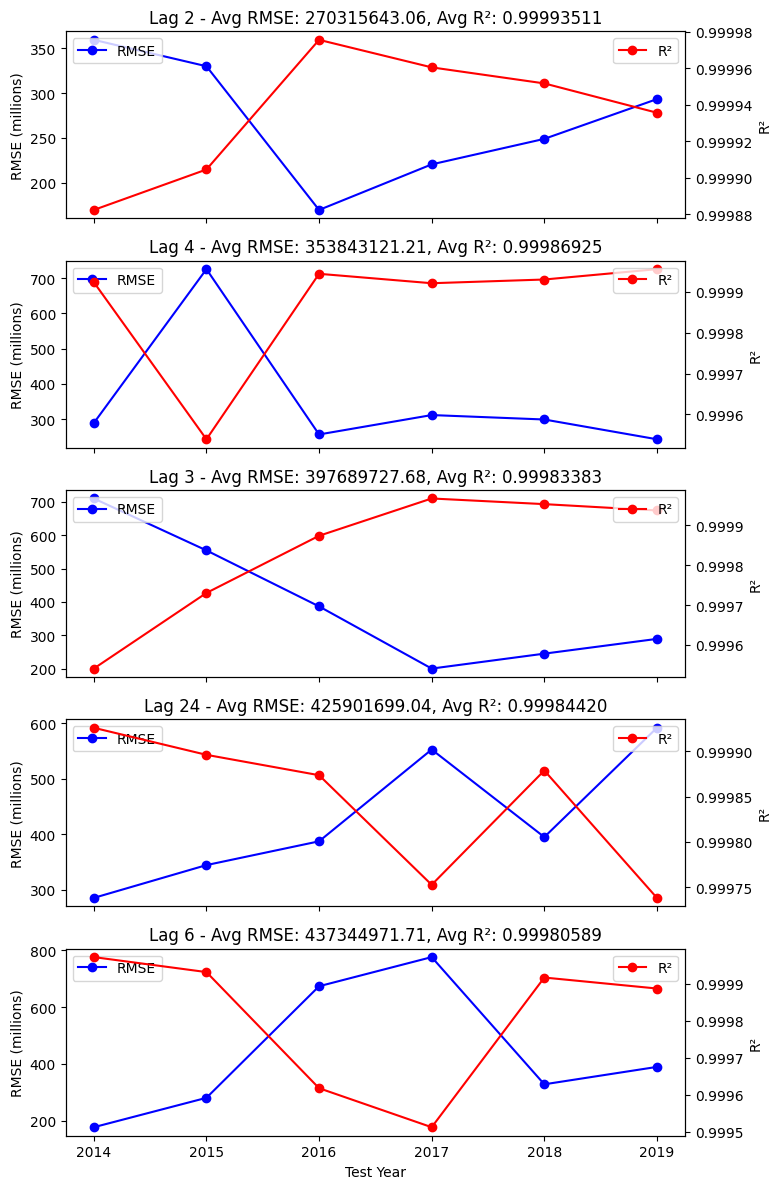

Overall average R²: 0.9995


In [83]:
lag_results = []
for lag in range(2, 41):
    results = cross_validate(df_imputed, start_year=2014, end_year=2020, lag_years=lag, 
                             target='CO2 emission (Tons)', lgb_params=lgb_params)
    rmse_values = [res['evaluation'][0] for res in results]
    r2_values = [res['evaluation'][2] for res in results]
    avg_rmse = np.mean(rmse_values)
    avg_r2 = np.mean(r2_values)
    lag_results.append((lag, avg_rmse, avg_r2, results))

lag_results.sort(key=lambda x: x[1])
best_lag = lag_results[4]

test_years = [res['test_year'] for res in best_lag[3]]
rmse_values = [res['evaluation'][0] for res in best_lag[3]]
r2_values = [res['evaluation'][2] for res in best_lag[3]]

fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex=True)

for i, (lag, avg_rmse, avg_r2, results) in enumerate(lag_results[:5]):
    test_years = [res['test_year'] for res in results]
    rmse_values = [res['evaluation'][0] for res in results]
    r2_values = [res['evaluation'][2] for res in results]
    
    ax1 = axes[i]
    ax1.set_title(f'Lag {lag} - Avg RMSE: {avg_rmse:.2f}, Avg R²: {avg_r2:.8f}')
    
    # Plot RMSE with label for the legend
    ax1.plot(test_years, [rmse / 1e6 for rmse in rmse_values], 'bo-', label='RMSE')
    ax1.set_ylabel('RMSE (millions)')
    
    ax2 = ax1.twinx()
    
    # Plot R² with label for the legend
    ax2.plot(test_years, r2_values, 'ro-', label='R²')
    ax2.set_ylabel('R²')
    
    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Set x-label for the last plot
axes[-1].set_xlabel('Test Year')

plt.tight_layout()
plt.show()

# Moyenne globale du R²
overall_avg_r2 = np.mean([r[2] for r in lag_results])
print(f'Overall average R²: {overall_avg_r2:.4f}')


**Cross-Validation Results (2014-2019)**  

We performed **cross-validation** from **2014 to 2019**, testing lag values between **2 and 40 years**. While a **2-year lag** achieved the lowest average RMSE (**270 million**), it performed worse on recent predictions compared to a **24-year lag**, which better captured recent trends.  

In contrast, **all other lags** resulted in RMSE values exceeding **350 million**.  

## Analyze results

In [115]:
def analyze_forecast(forecast_df, country_encoder):
    # Decode country names
    forecast_df['Country'] = country_encoder.inverse_transform(forecast_df['Country_encoded'])
    
    # Compute error percentage
    forecast_df['error'] = (forecast_df['CO2 emission (Tons)'] - forecast_df['forecast']) / forecast_df['CO2 emission (Tons)'] * 100
    
    # Aggregate yearly data
    yearly_real_emission = forecast_df.groupby('Year')['CO2 emission (Tons)'].sum()
    yearly_forecast = forecast_df.groupby('Year')['forecast'].sum()
    
    # Plot overall emissions
    plt.figure(figsize=(14, 10))
    plt.plot(yearly_real_emission.index, yearly_real_emission.values, label='Real Emissions', marker='o')
    plt.plot(yearly_forecast.index, yearly_forecast.values, label='Forecast', linestyle='--', marker='x')
    
    for i in range(len(yearly_real_emission)):
        plt.text(yearly_real_emission.index[i], yearly_real_emission.values[i], 
                 f'{yearly_real_emission.values[i]:,.2f}', ha='center', va='bottom', fontsize=10, color='blue')
    
    plt.xticks(yearly_real_emission.index, [str(year) for year in yearly_real_emission.index], rotation=45)
    plt.title('Evolution of Real CO2 Emissions vs. Forecast')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emission (Tons)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Identify worst countries by error
    country_error_sorted = forecast_df.groupby('Country').apply(lambda x: np.mean(np.abs(x['error'])))
    worst_countries = country_error_sorted.nlargest(5).index
    
    # Plot worst countries
    plt.figure(figsize=(14, 10))
    for i, country in enumerate(worst_countries, 1):
        country_data = forecast_df[forecast_df['Country'] == country]
        yearly_real_emission_country = country_data.groupby('Year')['CO2 emission (Tons)'].sum()
        yearly_forecast_country = country_data.groupby('Year')['forecast'].sum()
        
        yearly_real_emission_country.index = yearly_real_emission_country.index.astype(str)
        yearly_forecast_country.index = yearly_forecast_country.index.astype(str)
        
        plt.subplot(3, 2, i)
        plt.plot(yearly_real_emission_country.index, yearly_real_emission_country.values, label='Real Emissions', marker='o')
        plt.plot(yearly_forecast_country.index, yearly_forecast_country.values, label='Forecast', linestyle='--', marker='x')
        
        for j in range(len(yearly_real_emission_country)):
            plt.text(yearly_real_emission_country.index[j], yearly_real_emission_country.values[j], 
                     f'{yearly_real_emission_country.values[j]:,.2f}', ha='center', va='bottom', fontsize=10, color='blue')
        
        plt.title(f'Worst Forecasting: Evolution of Real CO2 Emissions vs. Forecast for {country}')
        plt.xlabel('Year')
        plt.ylabel('CO2 Emission (Tons)')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Compute quantiles and assign to dataframe
    quantiles = np.percentile(forecast_df['CO2 emission (Tons)'], np.arange(0, 101, 10))
    forecast_df['emission_quantile'] = pd.cut(forecast_df['CO2 emission (Tons)'], bins=quantiles, include_lowest=True, labels=[f"Q{i+1}" for i in range(len(quantiles)-1)])
    
    # Compute error per quantile
    error_by_quantile = forecast_df.groupby('emission_quantile')['error'].mean()
    
    # Plot error by quantile
    plt.figure(figsize=(14, 10))
    error_by_quantile.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Average Error by 10% Quantile of Real CO2 Emissions')
    plt.xlabel('Emission Quantile')
    plt.ylabel('Average Error (%)')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [116]:
# Parameters
columns = ['Country', '% of World', 'Size_Category', 'First Digit', 'Two First Digits']
split_year = 2019
lag_years = 24
target = 'CO2 emission (Tons)'
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'linear_tree': True
}
num_boost_round = 100
detrend_method = None

# Workflow
df_forecast = df_imputed.copy()
df_forecast, country_encoder = encode_categorical(df_forecast, 'Country')
df_forecast, size_encoder = encode_categorical(df_forecast, 'Size_Category')
df_forecast, first_dgt_encoder = encode_categorical(df_forecast, 'First Digit')
df_forecast, two_dgt_encoder = encode_categorical(df_forecast, 'Two First Digits')
train, test = split_data(df_forecast, 'Year', split_year)
#train, test = detrend(train, test, 'CO2 emission (Tons)', 'Country_encoded')
combined = pd.concat([train, test])
# Ensure you're referencing the encoded columns for feature preparation
encoded_columns = [
    'Country_encoded', 
    'First Digit_encoded',
] 
#encoded_columns = []

# Create lag features for the encoded columns and target
combined = create_lag_features(combined, 'Country_encoded', target, lag_years)

# Split data after lag feature creation
train_lagged, test_lagged = split_data(combined, 'Year', split_year)

feature_cols = encoded_columns + [f'lag_{lag}' for lag in range(1, lag_years + 1)] + ['% of World', 'trend_squared', 'trend_exp','calling_zone', 'Calling Code', 'first_emission_year']
X_train = train_lagged[feature_cols]
y_train = train_lagged[target]


# Predict
forecast_df, lgb_model = direct_forecast(
    train_lagged, y_train, test_lagged, feature_cols,year_col='Year', lgb_params=lgb_params
)

y_pred_final = forecast_df['forecast'].values
y_test_array = test_lagged['CO2 emission (Tons)'].values
# Evaluate
evaluate_model(y_test_array, y_pred_final)

RMSE: 622896501.0757686
MAE: 156871752.52574044
R²: 0.9997099064184388


(622896501.0757686, 156871752.52574044, 0.9997099064184388)

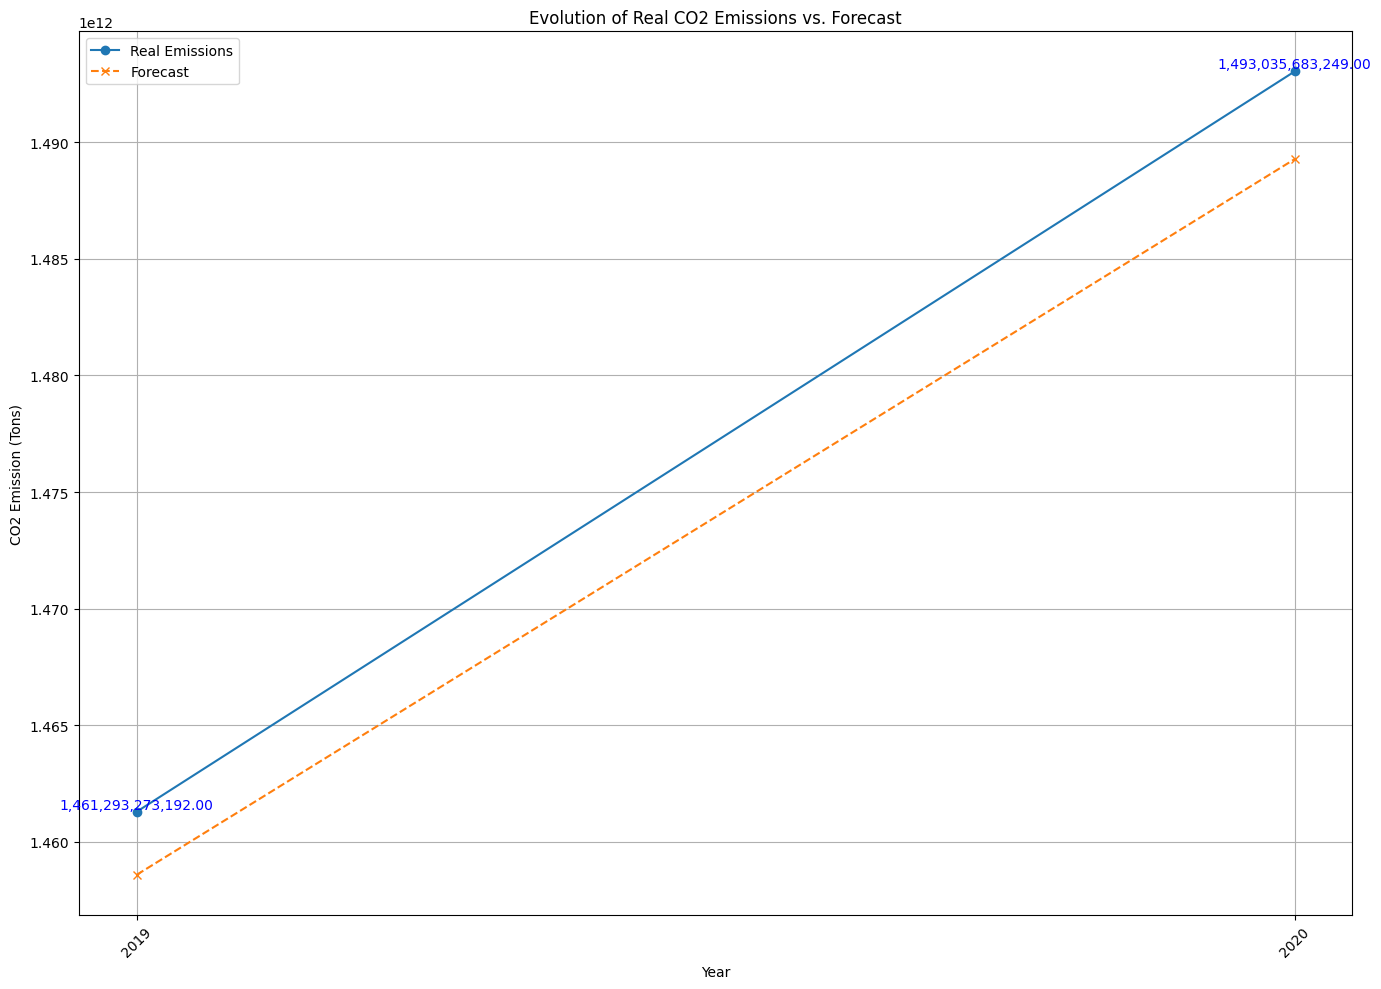

/var/folders/wm/q5f2cbh95hj16w74mp9sqq1c0000gn/T/ipykernel_2312/2599210309.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_error_sorted = forecast_df.groupby('Country').apply(lambda x: np.mean(np.abs(x['error'])))


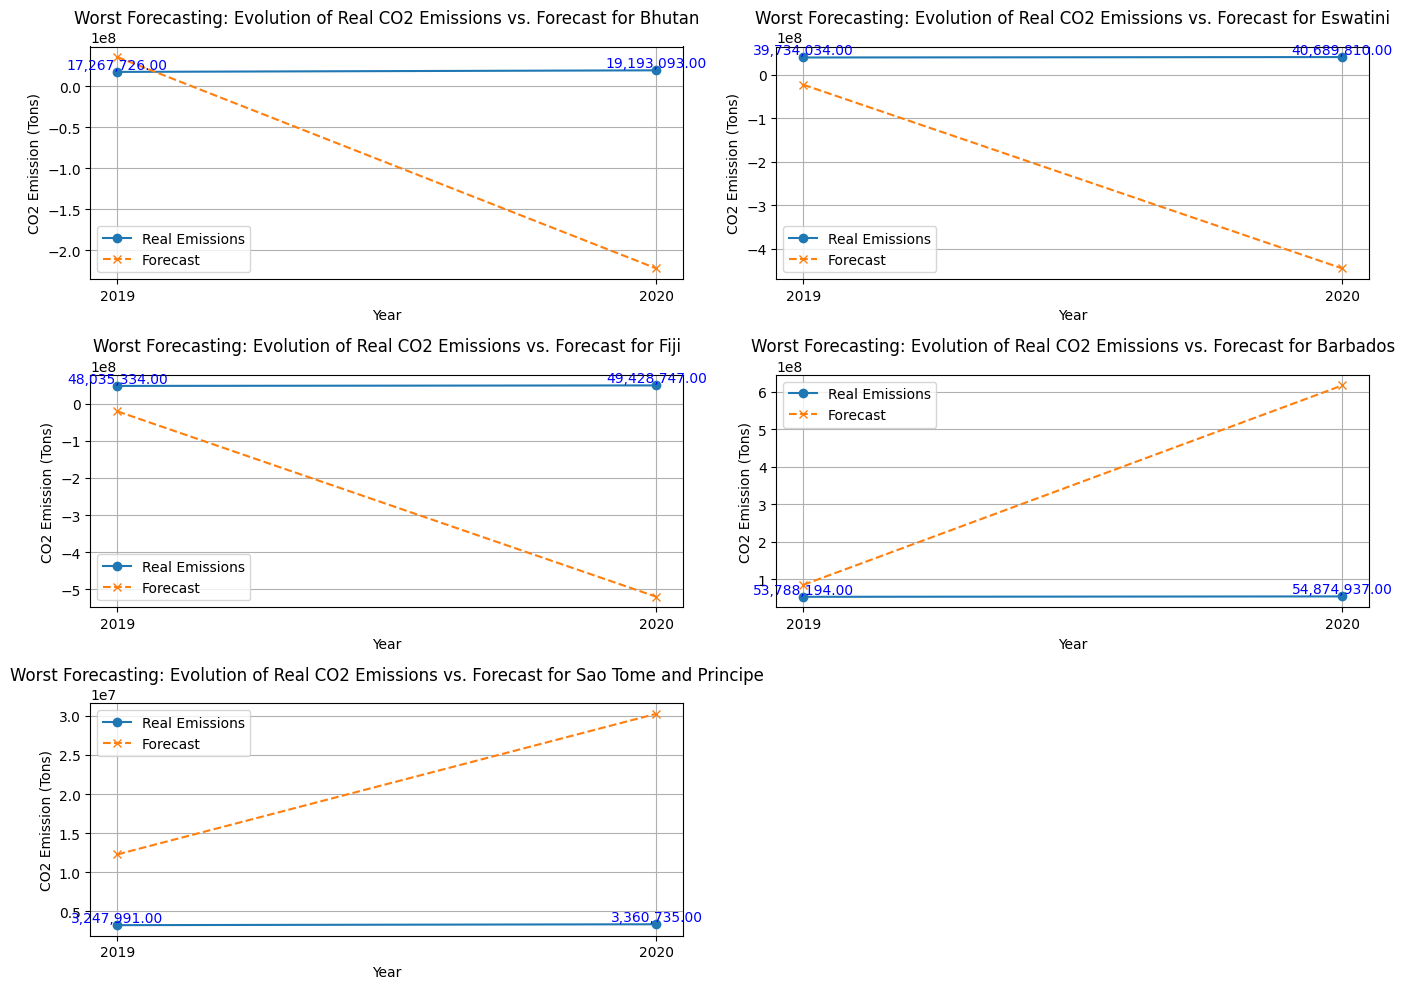

/var/folders/wm/q5f2cbh95hj16w74mp9sqq1c0000gn/T/ipykernel_2312/2599210309.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_quantile = forecast_df.groupby('emission_quantile')['error'].mean()


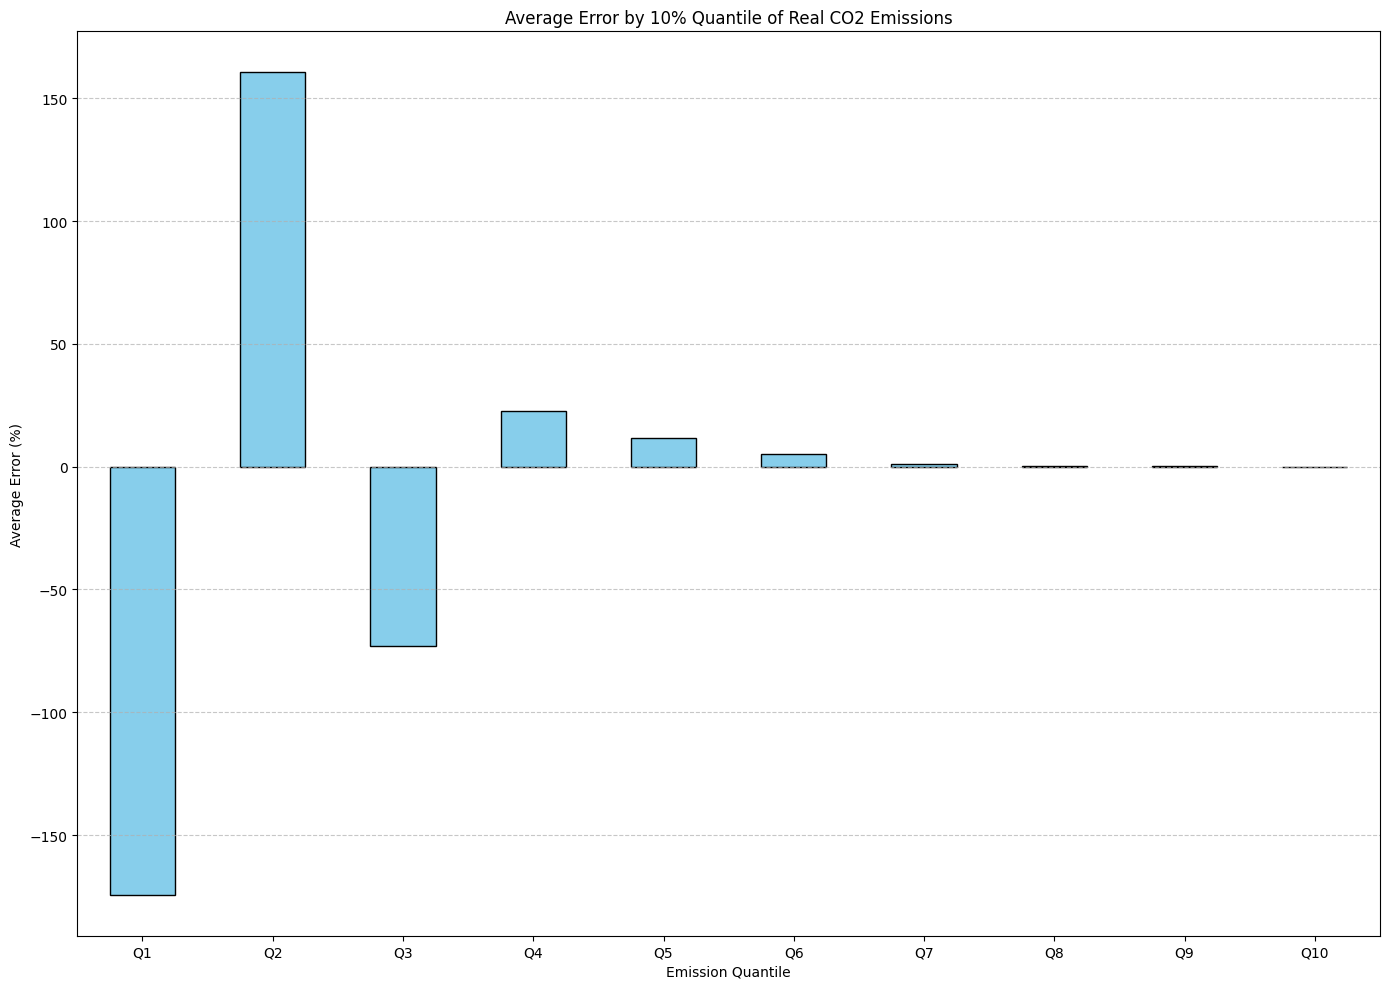

In [145]:
analyze_forecast(forecast_df, country_encoder)

In [146]:
# Parameters
columns = ['Country', '% of World', 'Size_Category', 'First Digit', 'Two First Digits']
split_year = 2019
lag_years = 24
target = 'CO2 emission (Tons)'
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 64,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'linear_tree': True,
    'num_iterations': 2000,
    #'monotone_constraints': (1,)
}

num_boost_round = 100
detrend_method = None

# Workflow
df_forecast = df_imputed.copy()
df_forecast, country_encoder = encode_categorical(df_forecast, 'Country')
df_forecast, size_encoder = encode_categorical(df_forecast, 'Size_Category')
df_forecast, first_dgt_encoder = encode_categorical(df_forecast, 'First Digit')
df_forecast, two_dgt_encoder = encode_categorical(df_forecast, 'Two First Digits')
train, test = split_data(df_forecast, 'Year', split_year)
#train, test = detrend(train, test, 'CO2 emission (Tons)', 'Country_encoded')
combined = pd.concat([train, test])
# Ensure you're referencing the encoded columns for feature preparation
encoded_columns = [
    'Country_encoded', 
    'First Digit_encoded',
] 
#encoded_columns = []

# Create lag features for the encoded columns and target
combined = create_lag_features(combined, 'Country_encoded', target, lag_years)

# Split data after lag feature creation
train_lagged, test_lagged = split_data(combined, 'Year', split_year)

feature_cols = encoded_columns + [f'lag_{lag}' for lag in range(1, lag_years + 1)] + ['% of World', 'trend_squared', 'trend_exp','calling_zone', 'Calling Code']
#lgb_params['monotone_constraints'] = [1 if feature == "Year" else 0 for feature in feature_cols]


X_train = train_lagged[feature_cols]
y_train = train_lagged[target]


# Predict
forecast_df, lgb_model = direct_forecast(
    train_lagged, y_train, test_lagged, feature_cols,year_col='Year', lgb_params=lgb_params
)

y_pred_final = forecast_df['forecast'].values
y_test_array = test_lagged['CO2 emission (Tons)'].values
# Evaluate
evaluate_model(y_test_array, y_pred_final)

RMSE: 275779922.307324
MAE: 111011207.35024467
R²: 0.9999431367566731


(275779922.307324, 111011207.35024467, 0.9999431367566731)

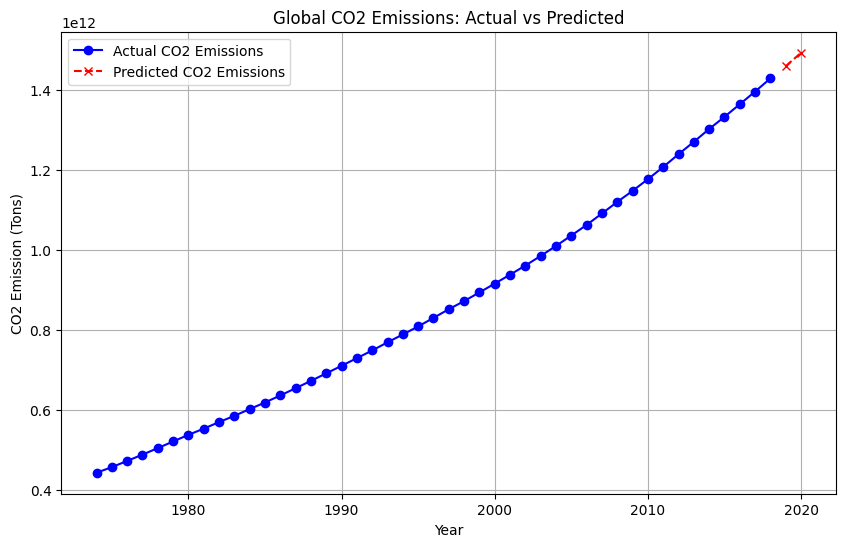

Last 10 values of Actual CO2 Emissions:
    Year  CO2 emission (Tons)
35  2009         1.147535e+12
36  2010         1.176735e+12
37  2011         1.207168e+12
38  2012         1.239068e+12
39  2013         1.270016e+12
40  2014         1.302123e+12
41  2015         1.332438e+12
42  2016         1.363938e+12
43  2017         1.395650e+12
44  2018         1.428458e+12

Last 10 values of Predicted CO2 Emissions:
   Year      forecast
0  2019  1.459091e+12
1  2020  1.492608e+12


In [147]:
# Aggregate CO2 emissions by year for df_forecast (actual emissions)
df_actual = train_lagged.groupby('Year')[target].sum().reset_index()

# Aggregate CO2 emissions by year for forecast_df (predicted emissions)
df_predicted = forecast_df.groupby('Year')['forecast'].sum().reset_index()

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df_actual['Year'], df_actual[target], label='Actual CO2 Emissions', color='blue', marker='o')
plt.plot(df_predicted['Year'], df_predicted['forecast'], label='Predicted CO2 Emissions', color='red', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Emission (Tons)')
plt.title('Global CO2 Emissions: Actual vs Predicted')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Print the last 10 values of actual and predicted emissions
print("Last 10 values of Actual CO2 Emissions:")
print(df_actual.tail(10))

print("\nLast 10 values of Predicted CO2 Emissions:")
print(df_predicted.tail(10))


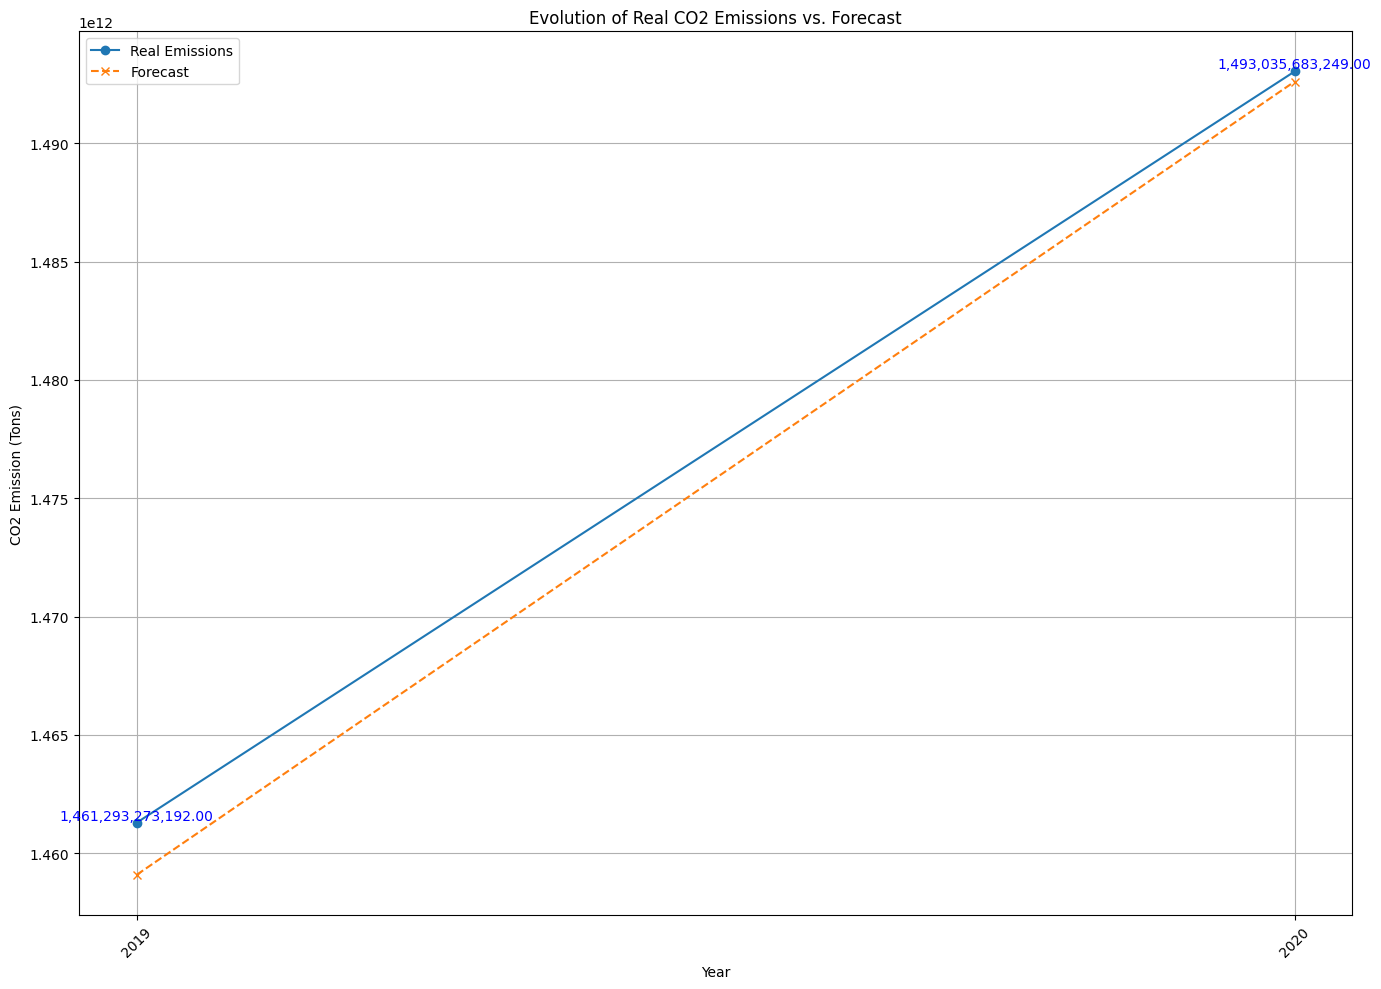

/var/folders/wm/q5f2cbh95hj16w74mp9sqq1c0000gn/T/ipykernel_2312/2599210309.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_error_sorted = forecast_df.groupby('Country').apply(lambda x: np.mean(np.abs(x['error'])))


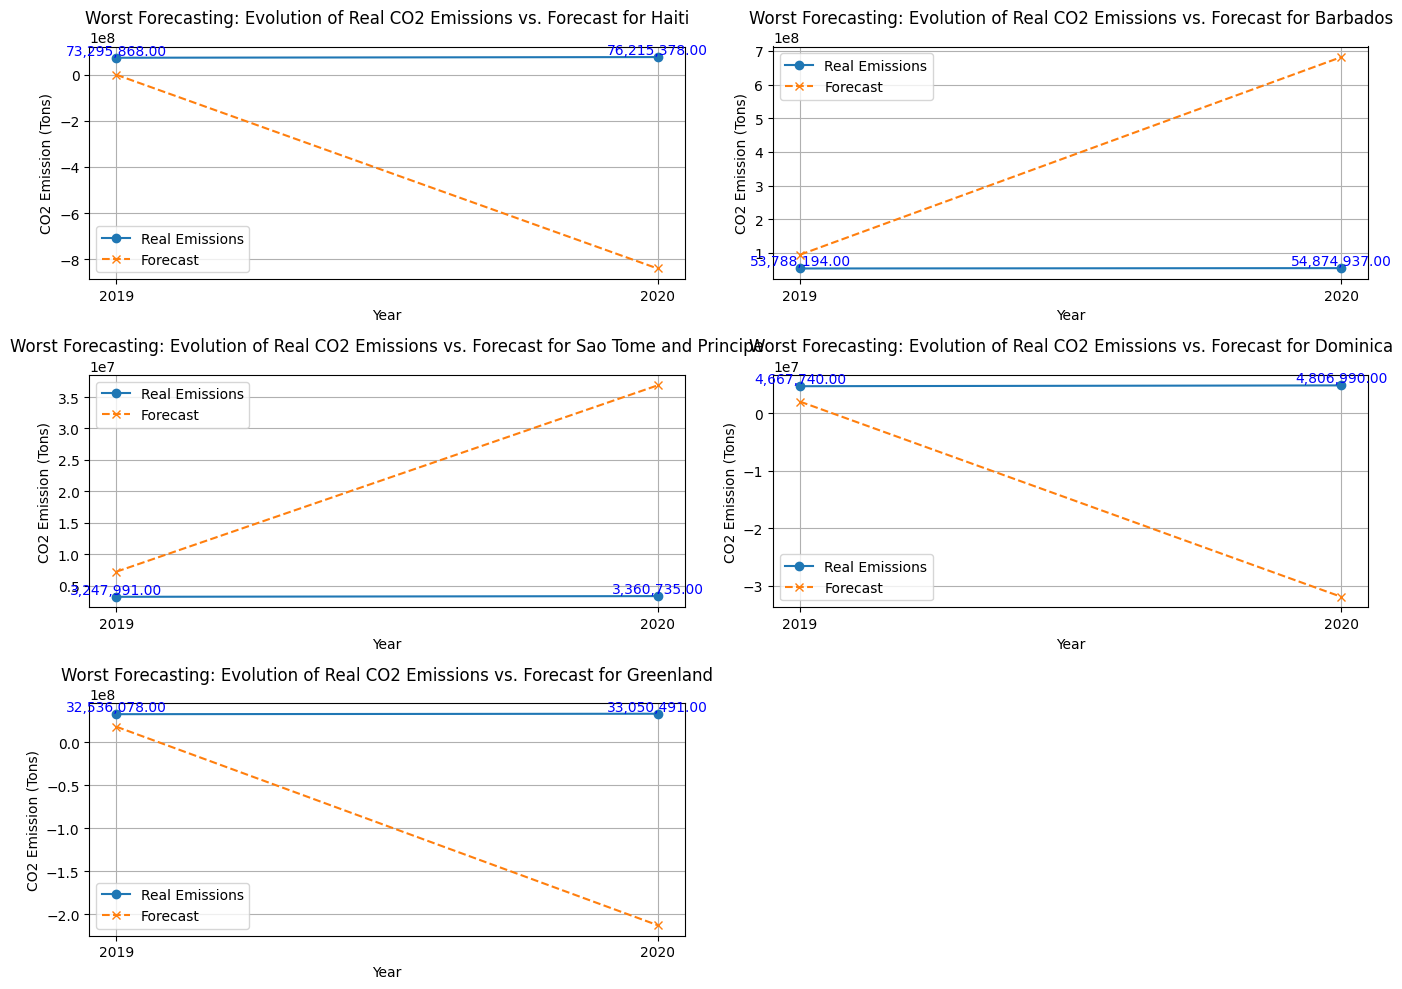

/var/folders/wm/q5f2cbh95hj16w74mp9sqq1c0000gn/T/ipykernel_2312/2599210309.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_quantile = forecast_df.groupby('emission_quantile')['error'].mean()


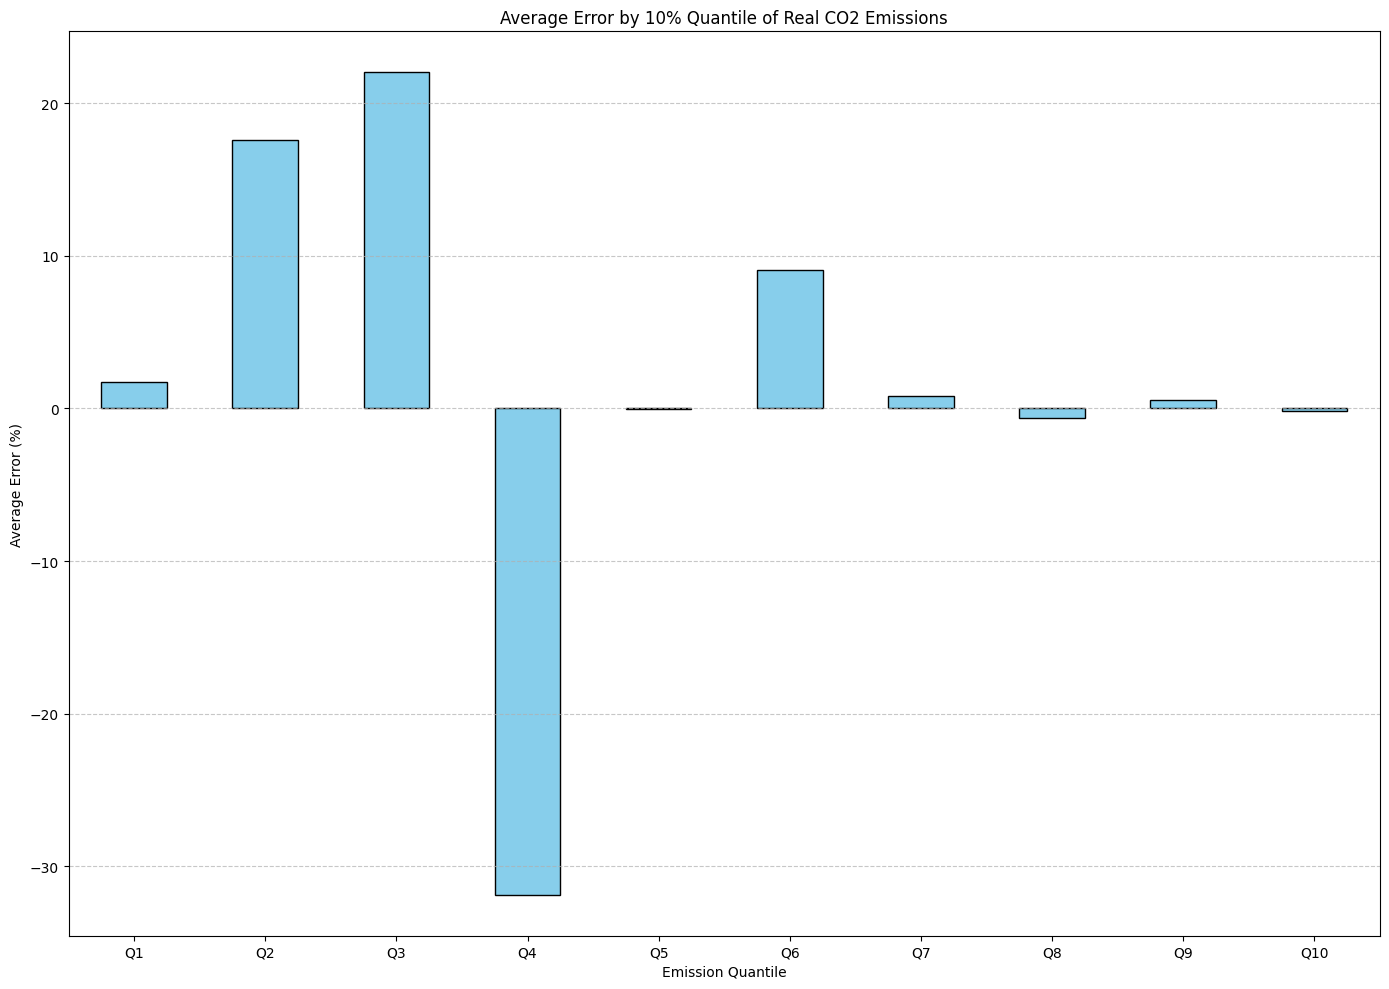

In [148]:
analyze_forecast(forecast_df, country_encoder)

**Findings on Lag Selection and Model Tuning**  

Given that **24 lags provided the best overall compromise**, we explored different configurations, segmenting countries by **emission quantiles (10%)** to assess performance variations across groups:  

1. With the selected parameters, the model yielded **excellent results for top emitters** (top 30 countries), nearly eliminating errors. However, for **low-emission countries** (Q1 and Q2), the percentage error exceeded **±170%**, making it unsuitable for general use.  

2. **Low learning rates (0.1)** combined with a high number of iterations resulted in better overall performance, striking a balance between **low RMSE** and **consistent error distribution across quantiles**. This configuration increased the percentage error of lowest emitters to **0%** and resulted in **Q4** having the largest percentage of error: **+30%**.


### Forecast 2021 and 2022

In [ ]:
# Essential parameters
split_year = 2020
lag_years = 24
target = 'CO2 emission (Tons)'
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 64,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'linear_tree': True,
    'num_iterations': 2000,
}


# Prepare data
df_forecast = df_imputed.copy()

# Encode categories
for col in ['Country', 'Size_Category', 'First Digit', 'Two First Digits']:
    df_forecast, _ = encode_categorical(df_forecast, col)

# Create lag features
df_forecast = create_lag_features(df_forecast, 'Country_encoded', target, lag_years)

# Define feature columns
feature_cols = ['Country_encoded', 'First Digit_encoded'] + \
               [f'lag_{lag}' for lag in range(1, lag_years + 1)] + \
               ['% of World','trend_squared', 'trend_exp', 'calling_zone', 'Calling Code']

# Get target values
y_train = df_forecast[target]

# Create 2021 forecast data
df_2021 = df_forecast[df_forecast['Year'] == split_year].copy()
df_2021['Year'] = split_year + 1

for lag in range(lag_years, 0, -1):
    if lag == 1:
        df_2021[f'lag_{lag}'] = df_2021[target].values
    else:
        df_2021[f'lag_{lag}'] = df_2021[f'lag_{lag-1}'].values

# Create 2022 forecast data  
df_2022 = df_2021.copy()
df_2022['Year'] = split_year + 2

# Update lag features for 2022
for lag in range(lag_years, 0, -1):
    if lag == 1:
        df_2022[f'lag_{lag}'] = None
    else:
        df_2022[f'lag_{lag}'] = df_2022[f'lag_{lag-1}'].values

# Combine future data
df_future = pd.concat([df_2021, df_2022], ignore_index=True)

# Update trend features
df_future["trend"] = df_future["Year"] - df_future['first_emission_year']
df_future["trend_squared"] = df_future["trend"] ** 2
df_future["trend_exp"] = 1.09 ** df_future["trend"]

# Generate forecast
forecast_df, _ = direct_forecast(
    df_forecast, y_train, df_future, feature_cols,
    year_col='Year', lgb_params=lgb_params
)

/var/folders/wm/q5f2cbh95hj16w74mp9sqq1c0000gn/T/ipykernel_2312/3297950198.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_future = pd.concat([df_2021, df_2022], ignore_index=True)


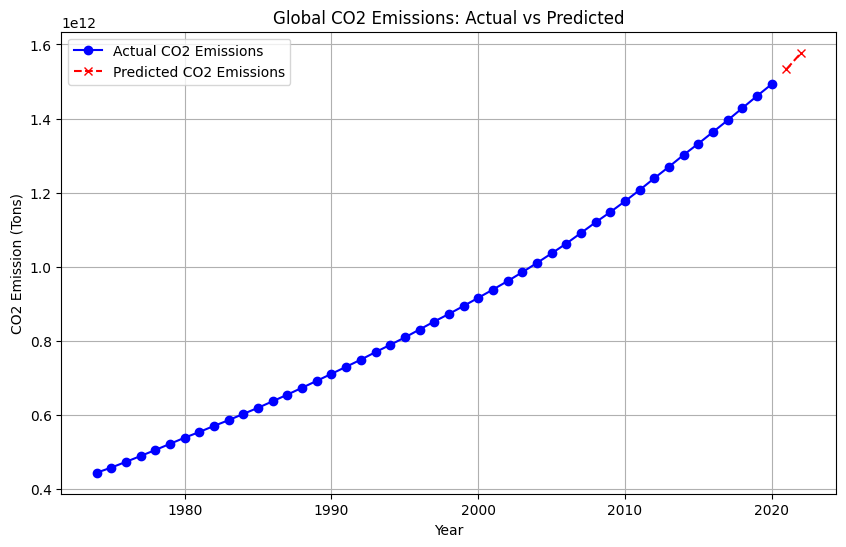

Last 10 values of Actual CO2 Emissions:
    Year  CO2 emission (Tons)
37  2011         1.207168e+12
38  2012         1.239068e+12
39  2013         1.270016e+12
40  2014         1.302123e+12
41  2015         1.332438e+12
42  2016         1.363938e+12
43  2017         1.395650e+12
44  2018         1.428458e+12
45  2019         1.461293e+12
46  2020         1.493036e+12

Last 10 values of Predicted CO2 Emissions:
   Year      forecast
0  2021  1.533395e+12
1  2022  1.577771e+12


In [152]:
# Aggregate CO2 emissions by year for df_forecast (actual emissions)
df_actual = df_forecast.groupby('Year')[target].sum().reset_index()

# Aggregate CO2 emissions by year for forecast_df (predicted emissions)
df_predicted = forecast_df.groupby('Year')['forecast'].sum().reset_index()

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df_actual['Year'], df_actual[target], label='Actual CO2 Emissions', color='blue', marker='o')
plt.plot(df_predicted['Year'], df_predicted['forecast'], label='Predicted CO2 Emissions', color='red', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Emission (Tons)')
plt.title('Global CO2 Emissions: Actual vs Predicted')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Print the last 10 values of actual and predicted emissions
print("Last 10 values of Actual CO2 Emissions:")
print(df_actual.tail(10))

print("\nLast 10 values of Predicted CO2 Emissions:")
print(df_predicted.tail(10))


We used the following parameters to forecast CO2 emissions for 2021 and 2022:

- **Lag years**: 24
- **Split year**: 2020
- **Target**: 'CO2 emission (Tons)'
- **LightGBM Parameters**:
  - objective: regression
  - metric: rmse
  - boosting_type: gbdt
  - num_leaves: 64
  - learning_rate: 0.01
  - feature_fraction: 0.9
  - num_iterations: 2000

The forecasted emissions for 2021, and 2022 were:

- **2020**: 1.493036e+12
- **2021**: 1.533395e+12
- **2022**: 1.577771e+12

**Growth Rate Calculation:**

- **Growth rate from 2020 to 2021**:  2.68%

- **Growth rate from 2021 to 2022**:  3.2%

## **Next Steps**

We identified several areas for improvement and further exploration:

1. **Data Expansion**:
   - Consider adding more external data sources, such as GDP, GDP growth estimations, and percentage of livable area.
   - While we've decided to stick to the current dataset for now, we could also integrate population data in future iterations to enrich the model.

2. **Model Exploration**:
   - We have primarily used **Moving Average** and **LightGBM** so far. In a next phase, we could experiment with additional models to compare performance.

3. **Detrending Techniques**:
   - **Z-score detrending** didn't yield the desired results, so we could explore alternative detrending methods. 

4. **More sophisticated hyperparameter tuning**
